In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Computer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 8
import seaborn as sns
# !pip install missingno
from plotnine import * # R에서 하는 방법과 유사하게 시각화한다
import missingno as msno # 결측치 시각화

Duplicate key in file WindowsPath('c:/python/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 255 ('font.size:    10.0')


영업 중인 전국 상가 업소 동향  
공공데이터포털(https://www.data.go.kr/)에서 '소상공인시장진흥공단' 검색

소상공인시장진흥공단_상가(상권)정보 중에서 서울과 부산 데이터만 읽어서 하나의 데이터프레임으로 만들어 csv 파일로 만들어 저장한다.

In [2]:
# read_csv() 메소드 이용
shop_2022_seoul = pd.read_csv('./data/shop_2022_seoul.csv')
shop_2022_busan = pd.read_csv('./data/shop_2022_busan.csv')
(shop_2022_seoul).head()

상가업소번호         상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드   상권업종중분류명  \
0  23324279       제중건강원  NaN         D       소매       D10    건강/미용식품   
1  24525909       민속악기사  NaN         D       소매       D04  취미/오락관련소매   
2  24715368       태평양진주  NaN         D       소매       D26   시계/귀금속소매   
3  15554136  김선희꼼꼼국어교습소  NaN         R    학문/교육       R01  학원-보습교습입시   
4  17174175         비지트  NaN         Q       음식       Q01         한식   

  상권업종소분류코드   상권업종소분류명 표준산업분류코드  ...                     건물관리번호     건물명  \
0    D10A07        건강원   G47216  ...  1156010600100410002034626     NaN   
1    D04A09       악기판매   G47593  ...  1120012200101420011000227     NaN   
2    D26A01     시계/귀금속   G47830  ...  1111015200100440000000001  금사랑투빌딩   
3    R01A01      학원-입시   P85501  ...  1171011100101970003017195     NaN   
4    Q01A01  한식/백반/한정식   I56111  ...  1165010100108540018009586   상랑의빌딩   

                     도로명주소   구우편번호   신우편번호  동정보  층정보  호정보          경도  \
0  서울특별시 영등포구 영중로14길 11-17  150035  7250.0  NaN    1  NaN  126.907168   
1         서울특별시 성동구 용답5길 2  133849  4803.0  NaN  NaN  NaN  127.049018   
2     서울특별시 종로구 서순라길 17-10  110390  3138.0  NaN  NaN  NaN  126.993530   
3    서울특별시 송파구 위례성대로12길 31  138834  5640.0  NaN    2  NaN  127.121520   
4      서울특별시 서초구 동광로18길 82  137837  6572.0  NaN    1  NaN  126.991394   

          위도  
0  37.520613  
1  37.566857  
2  37.571848  
3  37.510967  
4  37.488375  

[5 rows x 39 columns]

In [3]:
# [shop_2022_busan['지점명'=='당리점']]

In [4]:
# 서울 부산 df 결합
shop_2022 = pd.concat([shop_2022_seoul, shop_2022_busan], axis=0, ignore_index=True) # Index통합
shop_2022

상가업소번호         상호명    지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드   상권업종중분류명  \
0       23324279       제중건강원    NaN         D       소매       D10    건강/미용식품   
1       24525909       민속악기사    NaN         D       소매       D04  취미/오락관련소매   
2       24715368       태평양진주    NaN         D       소매       D26   시계/귀금속소매   
3       15554136  김선희꼼꼼국어교습소    NaN         R    학문/교육       R01  학원-보습교습입시   
4       17174175         비지트    NaN         Q       음식       Q01         한식   
...          ...         ...    ...       ...      ...       ...        ...   
540279  19076189       리오마죠레    NaN         F    생활서비스       F01    이/미용/건강   
540280  19076390       메이미래쉬    NaN         F    생활서비스       F01    이/미용/건강   
540281  19077180       크라운호프  부산학장점         Q       음식       Q09       유흥주점   
540282  19077185       가배원커피    당리점         Q       음식       Q12     커피점/카페   
540283  19078983         덴텍스    NaN         D       소매       D03      종합소매점   

       상권업종소분류코드     상권업종소분류명 표준산업분류코드  ...                     건물관리번호  \
0         D10A07          건강원   G47216  ...  1156010600100410002034626   
1         D04A09         악기판매   G47593  ...  1120012200101420011000227   
2         D26A01       시계/귀금속   G47830  ...  1111015200100440000000001   
3         R01A01        학원-입시   P85501  ...  1171011100101970003017195   
4         Q01A01    한식/백반/한정식   I56111  ...  1165010100108540018009586   
...          ...          ...      ...  ...                        ...   
540279    F01A01        여성미용실   S96112  ...  2635010300116320000000001   
540280    F01A03      비만/피부관리      NaN  ...  2644011400111900002000002   
540281    Q09A01        호프/맥주   I56219  ...  2653010700201450017006118   
540282    Q12A01  커피전문점/카페/다방   I56220  ...  2638010300106230017000001   
540283    D03A05       수입품판매점   G47190  ...  2611010800100230000006805   

                  건물명                     도로명주소   구우편번호    신우편번호  동정보  층정보  \
0                 NaN   서울특별시 영등포구 영중로14길 11-17  150035   7250.0  NaN    1   
1                 NaN          서울특별시 성동구 용답5길 2  133849   4803.0  NaN  NaN   
2              금사랑투빌딩      서울특별시 종로구 서순라길 17-10  110390   3138.0  NaN  NaN   
3                 NaN     서울특별시 송파구 위례성대로12길 31  138834   5640.0  NaN    2   
4               상랑의빌딩       서울특별시 서초구 동광로18길 82  137837   6572.0  NaN    1   
...               ...                       ...     ...      ...  ...  ...   
540279  아시아선수촌프레스센터상가        부산광역시 해운대구 반여로 131  612061  48037.0  NaN    1   
540280            NaN  부산광역시 강서구 과학산단로334번다길 60  618210  46743.0  NaN    1   
540281            NaN         부산광역시 사상구 대동로 111  617846  47050.0  NaN    3   
540282            NaN        부산광역시 사하구 낙동대로 413  604848  49410.0  101    1   
540283     경보이리스오션더스타          부산광역시 중구 대교로 133  600015  48943.0  NaN  NaN   

        호정보          경도         위도  
0       NaN  126.907168  37.520613  
1       NaN  127.049018  37.566857  
2       NaN  126.993530  37.571848  
3       NaN  127.121520  37.510967  
4       NaN  126.991394  37.488375  
...     ...         ...        ...  
540279  NaN  129.123373  35.203476  
540280  NaN  128.835928  35.149797  
540281  NaN  128.979739  35.139354  
540282  NaN  128.973045  35.103424  
540283  NaN  129.037433  35.101818  

[540284 rows x 39 columns]

In [5]:
# 결합해 만든 df를 csv파일로 저장
# shop_2022.to_csv('./data/shop_2022.csv', index=None) # 인덱스 제외하고 저장

In [6]:
# del : 메모리에서 변수 삭제
# del shop_2022_seoul, shop_2022_busan

In [7]:
shop_2022.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [8]:
# drop : 불필요한 컬럼 삭제(원본손상), axis 0 행방향 1 열방향 

# shop_2022 = shop_2022.drop('층정보', axis=1)

# shop_2022.drop(['동정보', '호정보'],axis=1, inplace=True)
# shop_2022.columns

분석 작업에 필요한 컬럼만 추려낸다

In [9]:
shop_2022.isnull().sum() # null 수

상가업소번호            0
상호명               1
지점명          453162
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      38031
표준산업분류명       38031
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지        104558
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        465928
건물관리번호            0
건물명          283713
도로명주소             0
구우편번호             0
신우편번호            49
동정보          472691
층정보          238045
호정보          540284
경도                0
위도                0
dtype: int64

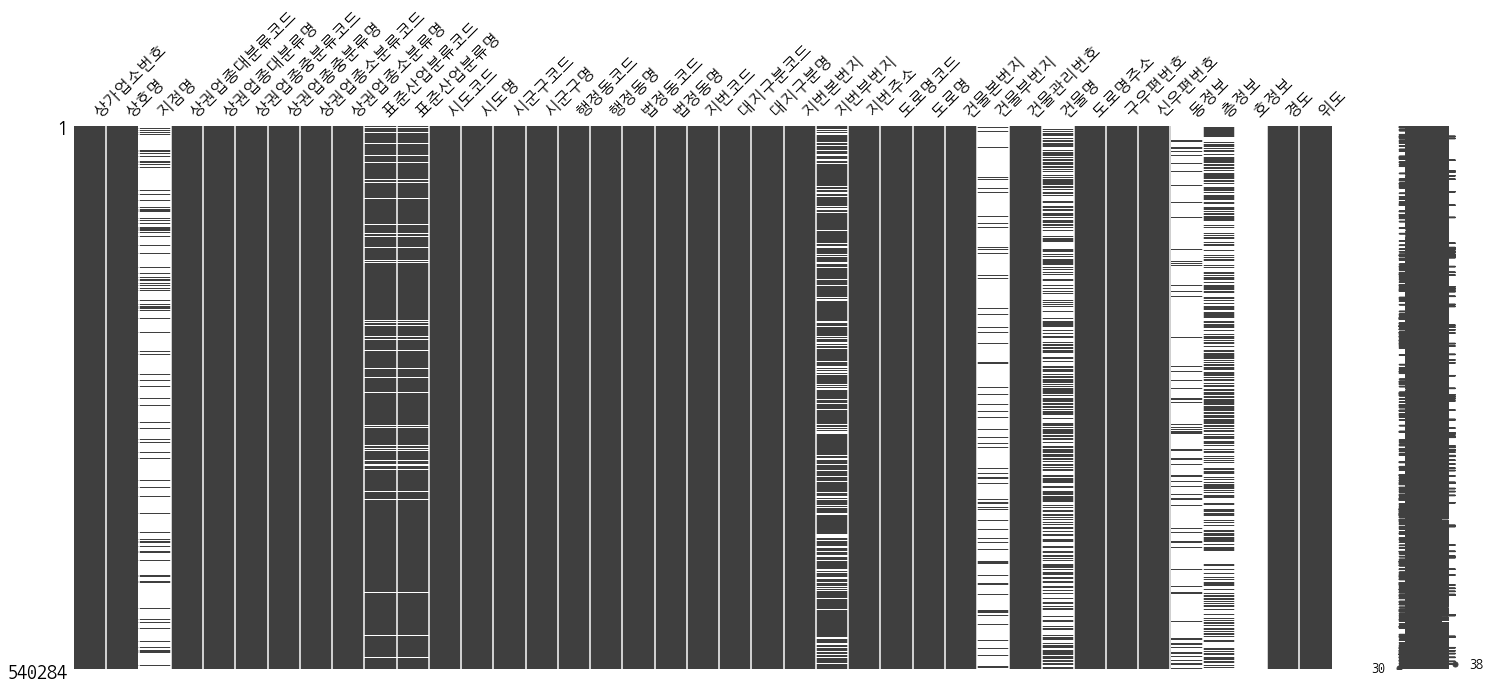

In [10]:
msno.matrix(shop_2022)
plt.show()

In [11]:
value_columns = ['상호명', '지점명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', '시도명', '시군구명', 
                '행정동명', '법정동명', '지번주소', '도로명주소', '경도', '위도']
shop_202212 = shop_2022[value_columns]
shop_202212

상호명    지점명 상권업종대분류명   상권업종중분류명     상권업종소분류명    시도명  시군구명  \
0            제중건강원    NaN       소매    건강/미용식품          건강원  서울특별시  영등포구   
1            민속악기사    NaN       소매  취미/오락관련소매         악기판매  서울특별시   성동구   
2            태평양진주    NaN       소매   시계/귀금속소매       시계/귀금속  서울특별시   종로구   
3       김선희꼼꼼국어교습소    NaN    학문/교육  학원-보습교습입시        학원-입시  서울특별시   송파구   
4              비지트    NaN       음식         한식    한식/백반/한정식  서울특별시   서초구   
...            ...    ...      ...        ...          ...    ...   ...   
540279       리오마죠레    NaN    생활서비스    이/미용/건강        여성미용실  부산광역시  해운대구   
540280       메이미래쉬    NaN    생활서비스    이/미용/건강      비만/피부관리  부산광역시   강서구   
540281       크라운호프  부산학장점       음식       유흥주점        호프/맥주  부산광역시   사상구   
540282       가배원커피    당리점       음식     커피점/카페  커피전문점/카페/다방  부산광역시   사하구   
540283         덴텍스    NaN       소매      종합소매점       수입품판매점  부산광역시    중구   

               행정동명    법정동명                    지번주소                     도로명주소  \
0              영등포동  영등포동5가  서울특별시 영등포구 영등포동5가 41-1   서울특별시 영등포구 영중로14길 11-17   
1               용답동     용답동    서울특별시 성동구 용답동 142-11          서울특별시 성동구 용답5길 2   
2       종로1.2.3.4가동     봉익동      서울특별시 종로구 봉익동 43-1      서울특별시 종로구 서순라길 17-10   
3              방이1동     방이동     서울특별시 송파구 방이동 197-3     서울특별시 송파구 위례성대로12길 31   
4              방배4동     방배동    서울특별시 서초구 방배동 854-18       서울특별시 서초구 동광로18길 82   
...             ...     ...                     ...                       ...   
540279         반여1동     반여동     부산광역시 해운대구 반여동 1632        부산광역시 해운대구 반여로 131   
540280          녹산동     지사동    부산광역시 강서구 지사동 1190-2  부산광역시 강서구 과학산단로334번다길 60   
540281          학장동     학장동    부산광역시 사상구 학장동 579-25         부산광역시 사상구 대동로 111   
540282         하단1동     하단동    부산광역시 사하구 하단동 623-17        부산광역시 사하구 낙동대로 413   
540283          중앙동   중앙동5가       부산광역시 중구 중앙동5가 23          부산광역시 중구 대교로 133   

                경도         위도  
0       126.907168  37.520613  
1       127.049018  37.566857  
2       126.993530  37.571848  
3       127.121520  37.510967  
4       126.991394  37.488375  
...            ...        ...  
540279  129.123373  35.203476  
540280  128.835928  35.149797  
540281  128.979739  35.139354  
540282  128.973045  35.103424  
540283  129.037433  35.101818  

[540284 rows x 13 columns]

In [12]:
del shop_2022

In [13]:
shop_202212.isnull().sum()

상호명              1
지점명         453162
상권업종대분류명         0
상권업종중분류명         0
상권업종소분류명         0
시도명              0
시군구명             0
행정동명             0
법정동명             0
지번주소             0
도로명주소            0
경도               0
위도               0
dtype: int64

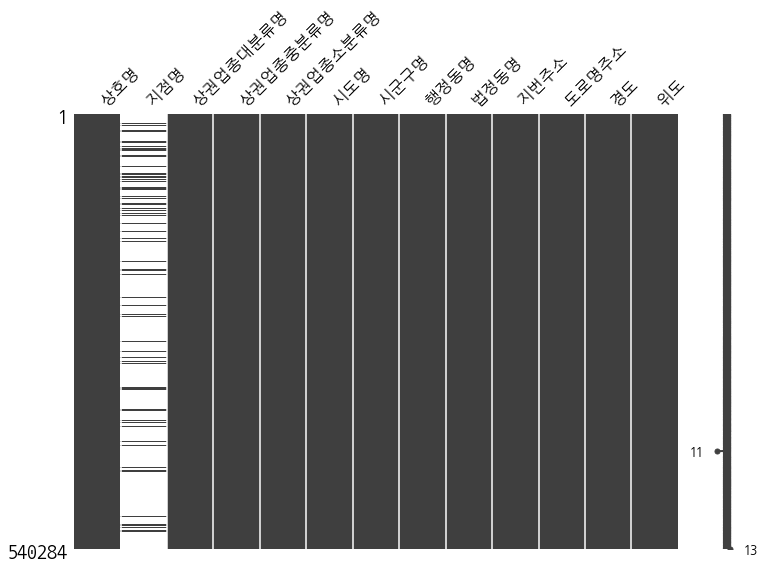

In [14]:
msno.matrix(shop_202212, figsize=(12,8))
plt.show()

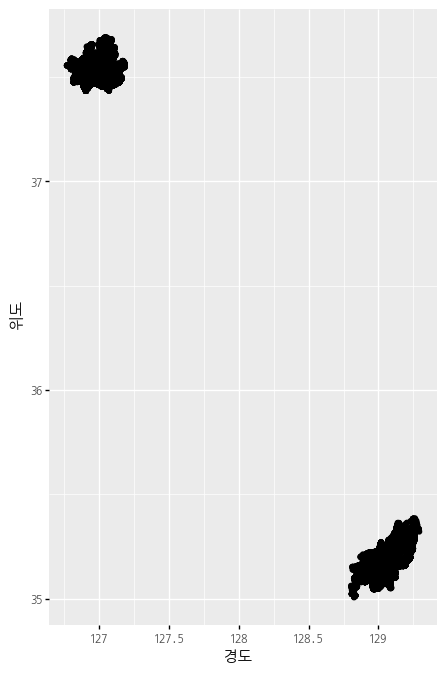

<ggplot: (-9223371851320382895)>

In [15]:
# (
#     ggplot(shop_202212, aes(x='경도' ,y='위도'))
#         +geom_point()
#         +theme(text=element_text(family='NanumGothicCoding'),figure_size=(5,8))
# )

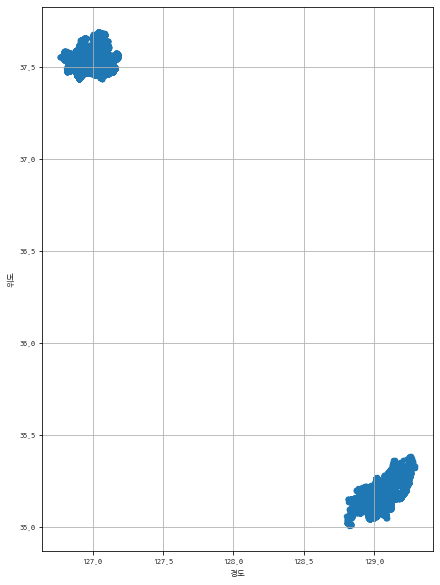

In [16]:
# shop_202212.plot.scatter('경도','위도',figsize=(7,10),grid=True)
# plt.show()

In [17]:
shop_202212

상호명    지점명 상권업종대분류명   상권업종중분류명     상권업종소분류명    시도명  시군구명  \
0            제중건강원    NaN       소매    건강/미용식품          건강원  서울특별시  영등포구   
1            민속악기사    NaN       소매  취미/오락관련소매         악기판매  서울특별시   성동구   
2            태평양진주    NaN       소매   시계/귀금속소매       시계/귀금속  서울특별시   종로구   
3       김선희꼼꼼국어교습소    NaN    학문/교육  학원-보습교습입시        학원-입시  서울특별시   송파구   
4              비지트    NaN       음식         한식    한식/백반/한정식  서울특별시   서초구   
...            ...    ...      ...        ...          ...    ...   ...   
540279       리오마죠레    NaN    생활서비스    이/미용/건강        여성미용실  부산광역시  해운대구   
540280       메이미래쉬    NaN    생활서비스    이/미용/건강      비만/피부관리  부산광역시   강서구   
540281       크라운호프  부산학장점       음식       유흥주점        호프/맥주  부산광역시   사상구   
540282       가배원커피    당리점       음식     커피점/카페  커피전문점/카페/다방  부산광역시   사하구   
540283         덴텍스    NaN       소매      종합소매점       수입품판매점  부산광역시    중구   

               행정동명    법정동명                    지번주소                     도로명주소  \
0              영등포동  영등포동5가  서울특별시 영등포구 영등포동5가 41-1   서울특별시 영등포구 영중로14길 11-17   
1               용답동     용답동    서울특별시 성동구 용답동 142-11          서울특별시 성동구 용답5길 2   
2       종로1.2.3.4가동     봉익동      서울특별시 종로구 봉익동 43-1      서울특별시 종로구 서순라길 17-10   
3              방이1동     방이동     서울특별시 송파구 방이동 197-3     서울특별시 송파구 위례성대로12길 31   
4              방배4동     방배동    서울특별시 서초구 방배동 854-18       서울특별시 서초구 동광로18길 82   
...             ...     ...                     ...                       ...   
540279         반여1동     반여동     부산광역시 해운대구 반여동 1632        부산광역시 해운대구 반여로 131   
540280          녹산동     지사동    부산광역시 강서구 지사동 1190-2  부산광역시 강서구 과학산단로334번다길 60   
540281          학장동     학장동    부산광역시 사상구 학장동 579-25         부산광역시 사상구 대동로 111   
540282         하단1동     하단동    부산광역시 사하구 하단동 623-17        부산광역시 사하구 낙동대로 413   
540283          중앙동   중앙동5가       부산광역시 중구 중앙동5가 23          부산광역시 중구 대교로 133   

                경도         위도  
0       126.907168  37.520613  
1       127.049018  37.566857  
2       126.993530  37.571848  
3       127.121520  37.510967  
4       126.991394  37.488375  
...            ...        ...  
540279  129.123373  35.203476  
540280  128.835928  35.149797  
540281  128.979739  35.139354  
540282  128.973045  35.103424  
540283  129.037433  35.101818  

[540284 rows x 13 columns]

서울 데이터만 추출한다

In [18]:
# 시도명 열에 '서울특별시', '서울', '서울시'와 같이 입력값이 혼재되어 있다면 아래와 같이 논리 연산을 실행해야 한다.
# 판다스 불린 인덱싱 and :'&' 를  or : '|'를 사용한다.

# and, or 조건 지정시 관계 연산자가 사용된 부분(브로드캐스팅이 실행되는 부분)을 반드시 ()로 묶어야 한다.
# shop_202209[(shop_202209['시도명'] == '서울특별시') | (shop_202209['시도명'] == '서울') | (shop_202209['시도명'] == '서울시')]
# 서울특별시 | 서울시 
# shop_202212[(shop_202212['시도명']=='서울특별시' )|(shop_202212['시도명']=='서울시' ) ]


# 시도명열 또는 지번주소열 또는 도로명주소열의 입력값이 서울로 시작하는 데이터를 얻어온다.
# shop_202212[shop_202212.시도명.str[:2]=='서울']

# shop_202212[shop_202212.시도명.str.find('서울')>=0] # find
shop_saha = shop_202212[shop_202212.지번주소.str.find('사하구')>=0] # find

# shop_202212[shop_202212.시도명.str.count('서울')>=1] # count
# shop_202212[shop_202212.행정동명.str.find('당리동')>=0] 


# startswith()  인수로 시작하면 True, 않으면 False.
# endswith()  인수로 끝나면 True, 않으면 False.
shop_dangni = shop_202212[shop_202212.행정동명.str.startswith('당리')] 
shop_dangni.head(100)

상호명  지점명  상권업종대분류명   상권업종중분류명 상권업종소분류명    시도명 시군구명 행정동명 법정동명  \
377728      럭키사진관  NaN     생활서비스         사진      사진관  부산광역시  사하구  당리동  당리동   
378085       수현꽃집  NaN        소매  선물/팬시/기념품   꽃집/꽃배달  부산광역시  사하구  당리동  당리동   
378415     럭셔리베이비  NaN        소매       유아용품   유아용품판매  부산광역시  사하구  당리동  당리동   
378462  뉴에쿠스소주노래방  NaN  관광/여가/오락   무도/유흥/가무      노래방  부산광역시  사하구  당리동  당리동   
378668       삼창슈퍼  NaN        소매      종합소매점     수퍼마켓  부산광역시  사하구  당리동  당리동   
...           ...  ...       ...        ...      ...    ...  ...  ...  ...   
390023        타타타  NaN  관광/여가/오락   무도/유흥/가무      노래방  부산광역시  사하구  당리동  당리동   
390025      이지컴퓨터  NaN     생활서비스  개인/가정용품수리    컴퓨터수리  부산광역시  사하구  당리동  당리동   
390076      신일주차장  NaN     생활서비스    자동차/이륜차    주차장운영  부산광역시  사하구  당리동  당리동   
390173        아모레  NaN        소매      화장품소매   화장품판매점  부산광역시  사하구  당리동  당리동   
390189      손수연헤어  NaN     생활서비스    이/미용/건강    여성미용실  부산광역시  사하구  당리동  당리동   

                        지번주소                   도로명주소          경도         위도  
377728  부산광역시 사하구 당리동 325-30      부산광역시 사하구 낙동대로 395  128.974794  35.102905  
378085   부산광역시 사하구 당리동 317-9  부산광역시 사하구 낙동대로410번길 14  128.974177  35.104533  
378415  부산광역시 사하구 당리동 336-21      부산광역시 사하구 낙동대로 365  128.977654  35.101728  
378462  부산광역시 사하구 당리동 303-12    부산광역시 사하구 낙동대로 456-1  128.969422  35.105887  
378668  부산광역시 사하구 당리동 316-17        부산광역시 사하구 제석로 36  128.972971  35.104524  
...                      ...                     ...         ...        ...  
390023  부산광역시 사하구 당리동 305-61     부산광역시 사하구 승학로2번길 25  128.970362  35.105618  
390025  부산광역시 사하구 당리동 341-16      부산광역시 사하구 낙동대로 364  128.978249  35.101940  
390076   부산광역시 사하구 당리동 303-6      부산광역시 사하구 승학로2번길 2  128.969239  35.106186  
390173   부산광역시 사하구 당리동 16-12       부산광역시 사하구 제석로 171  128.983589  35.110974  
390189   부산광역시 사하구 당리동 105-3        부산광역시 사하구 제석로 80  128.976130  35.107311  

[100 rows x 13 columns]

In [19]:
#  not : ~ 
shop_expect_seoul = shop_202212[~shop_202212.시도명.str.startswith('서울')]
shop_expect_seoul

상호명    지점명 상권업종대분류명   상권업종중분류명     상권업종소분류명    시도명  시군구명  행정동명  \
377724    미광장    NaN       숙박  모텔/여관/여인숙    모텔/여관/여인숙  부산광역시    중구   부평동   
377725  BHC치킨    동래점       음식     닭/오리요리    후라이드/양념치킨  부산광역시   동래구   복산동   
377726    스텔라    NaN       소매       의복의류         일반의류  부산광역시   수영구  남천2동   
377727   도란도란    NaN       음식         한식    한식/백반/한정식  부산광역시  부산진구  개금1동   
377728  럭키사진관    NaN    생활서비스         사진          사진관  부산광역시   사하구   당리동   
...       ...    ...      ...        ...          ...    ...   ...   ...   
540279  리오마죠레    NaN    생활서비스    이/미용/건강        여성미용실  부산광역시  해운대구  반여1동   
540280  메이미래쉬    NaN    생활서비스    이/미용/건강      비만/피부관리  부산광역시   강서구   녹산동   
540281  크라운호프  부산학장점       음식       유흥주점        호프/맥주  부산광역시   사상구   학장동   
540282  가배원커피    당리점       음식     커피점/카페  커피전문점/카페/다방  부산광역시   사하구  하단1동   
540283    덴텍스    NaN       소매      종합소매점       수입품판매점  부산광역시    중구   중앙동   

         법정동명                  지번주소                      도로명주소          경도  \
377724  부평동4가   부산광역시 중구 부평동4가 25-1        부산광역시 중구 보수대로44번길 5  129.023668   
377725    복천동     부산광역시 동래구 복천동 185      부산광역시 동래구 동래로147번길 18  129.087156   
377726    남천동   부산광역시 수영구 남천동 148-4        부산광역시 수영구 광안해변로 100  129.115397   
377727    개금동  부산광역시 부산진구 개금동 174-4  부산광역시 부산진구 가야대로482번길 29-3  129.024938   
377728    당리동  부산광역시 사하구 당리동 325-30         부산광역시 사하구 낙동대로 395  128.974794   
...       ...                   ...                        ...         ...   
540279    반여동   부산광역시 해운대구 반여동 1632         부산광역시 해운대구 반여로 131  129.123373   
540280    지사동  부산광역시 강서구 지사동 1190-2   부산광역시 강서구 과학산단로334번다길 60  128.835928   
540281    학장동  부산광역시 사상구 학장동 579-25          부산광역시 사상구 대동로 111  128.979739   
540282    하단동  부산광역시 사하구 하단동 623-17         부산광역시 사하구 낙동대로 413  128.973045   
540283  중앙동5가     부산광역시 중구 중앙동5가 23           부산광역시 중구 대교로 133  129.037433   

               위도  
377724  35.100979  
377725  35.205267  
377726  35.143770  
377727  35.151645  
377728  35.102905  
...           ...  
540279  35.203476  
540280  35.149797  
540281  35.139354  
540282  35.103424  
540283  35.101818  

[162560 rows x 13 columns]

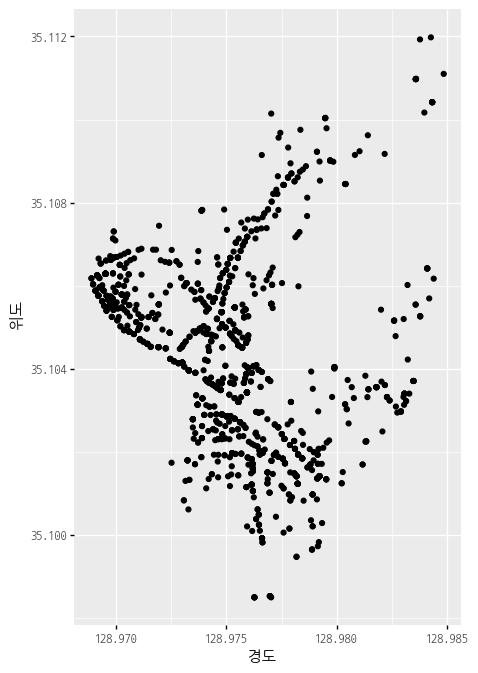

<ggplot: (185535229111)>

In [20]:
(
    ggplot(shop_dangni, aes(x='경도' ,y='위도'))
        +geom_point()
        +theme(text=element_text(family='NanumGothicCoding'),figure_size=(5,8))
)

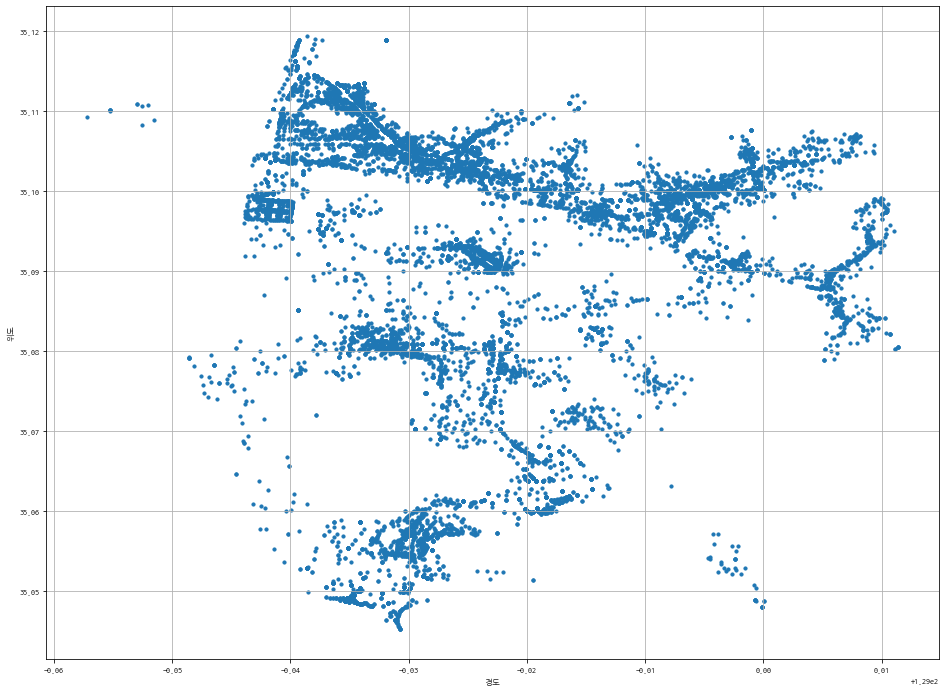

In [21]:
shop_saha.plot.scatter('경도','위도',grid=True,s=10,figsize=(16,12))
plt.show()

In [22]:
addr= shop_202212.도로명주소
print(type(addr))
print(addr)

<class 'pandas.core.series.Series'>
0          서울특별시 영등포구 영중로14길 11-17
1                 서울특별시 성동구 용답5길 2
2             서울특별시 종로구 서순라길 17-10
3            서울특별시 송파구 위례성대로12길 31
4              서울특별시 서초구 동광로18길 82
                    ...           
540279          부산광역시 해운대구 반여로 131
540280    부산광역시 강서구 과학산단로334번다길 60
540281           부산광역시 사상구 대동로 111
540282          부산광역시 사하구 낙동대로 413
540283            부산광역시 중구 대교로 133
Name: 도로명주소, Length: 540284, dtype: object


In [23]:
# split() , expand=True : 공백을 경계로 문자열을 구분해서 '시도'열과 '구군'열을 만든다.
print(shop_202212[:1].도로명주소) # <class 'pandas.core.series.Series'>
print(shop_202212[:1].도로명주소.str) # <class 'pandas.core.strings.StringMethods'>
print(shop_202212[:1].도로명주소.str.split()) # <class 'pandas.core.series.Series'>
print('=' * 80)
# expand=True 옵션 구분자를 경계로 문자열을 구분해서 데이터프레임으로 리턴한다. => 여러개의 열로 나눈다.
print(shop_202212[:1].도로명주소.str.split(' ', expand=True)) # <class 'pandas.core.frame.DataFrame'>
print('=' * 80)
print(shop_202212[:1].도로명주소.str.split(' ', expand=True)[0]) 
print(shop_202212[:1].도로명주소.str.split(' ', expand=True)[1]) 



0    서울특별시 영등포구 영중로14길 11-17
Name: 도로명주소, dtype: object
0    [서울특별시, 영등포구, 영중로14길, 11-17]
Name: 도로명주소, dtype: object
       0     1       2      3
0  서울특별시  영등포구  영중로14길  11-17
0    서울특별시
Name: 0, dtype: object
0    영등포구
Name: 1, dtype: object


In [24]:
shop_202212['시도'] = shop_202212['도로명주소'].str.split(' ', expand=True)[0]
shop_202212['구군'] = shop_202212.도로명주소.str.split(' ', expand=True)[1]
shop_202212['도로명'] = shop_202212.도로명주소.str.split(' ', expand=True)[2]
# shop_202212['세부주소'] = shop_202212.도로명주소.str.split(' ', expand=True)[3]
shop_202212

상호명    지점명 상권업종대분류명   상권업종중분류명     상권업종소분류명    시도명  시군구명  \
0            제중건강원    NaN       소매    건강/미용식품          건강원  서울특별시  영등포구   
1            민속악기사    NaN       소매  취미/오락관련소매         악기판매  서울특별시   성동구   
2            태평양진주    NaN       소매   시계/귀금속소매       시계/귀금속  서울특별시   종로구   
3       김선희꼼꼼국어교습소    NaN    학문/교육  학원-보습교습입시        학원-입시  서울특별시   송파구   
4              비지트    NaN       음식         한식    한식/백반/한정식  서울특별시   서초구   
...            ...    ...      ...        ...          ...    ...   ...   
540279       리오마죠레    NaN    생활서비스    이/미용/건강        여성미용실  부산광역시  해운대구   
540280       메이미래쉬    NaN    생활서비스    이/미용/건강      비만/피부관리  부산광역시   강서구   
540281       크라운호프  부산학장점       음식       유흥주점        호프/맥주  부산광역시   사상구   
540282       가배원커피    당리점       음식     커피점/카페  커피전문점/카페/다방  부산광역시   사하구   
540283         덴텍스    NaN       소매      종합소매점       수입품판매점  부산광역시    중구   

               행정동명    법정동명                    지번주소                     도로명주소  \
0              영등포동  영등포동5가  서울특별시 영등포구 영등포동5가 41-1   서울특별시 영등포구 영중로14길 11-17   
1               용답동     용답동    서울특별시 성동구 용답동 142-11          서울특별시 성동구 용답5길 2   
2       종로1.2.3.4가동     봉익동      서울특별시 종로구 봉익동 43-1      서울특별시 종로구 서순라길 17-10   
3              방이1동     방이동     서울특별시 송파구 방이동 197-3     서울특별시 송파구 위례성대로12길 31   
4              방배4동     방배동    서울특별시 서초구 방배동 854-18       서울특별시 서초구 동광로18길 82   
...             ...     ...                     ...                       ...   
540279         반여1동     반여동     부산광역시 해운대구 반여동 1632        부산광역시 해운대구 반여로 131   
540280          녹산동     지사동    부산광역시 강서구 지사동 1190-2  부산광역시 강서구 과학산단로334번다길 60   
540281          학장동     학장동    부산광역시 사상구 학장동 579-25         부산광역시 사상구 대동로 111   
540282         하단1동     하단동    부산광역시 사하구 하단동 623-17        부산광역시 사하구 낙동대로 413   
540283          중앙동   중앙동5가       부산광역시 중구 중앙동5가 23          부산광역시 중구 대교로 133   

                경도         위도     시도    구군          도로명  
0       126.907168  37.520613  서울특별시  영등포구       영중로14길  
1       127.049018  37.566857  서울특별시   성동구         용답5길  
2       126.993530  37.571848  서울특별시   종로구         서순라길  
3       127.121520  37.510967  서울특별시   송파구     위례성대로12길  
4       126.991394  37.488375  서울특별시   서초구       동광로18길  
...            ...        ...    ...   ...          ...  
540279  129.123373  35.203476  부산광역시  해운대구          반여로  
540280  128.835928  35.149797  부산광역시   강서구  과학산단로334번다길  
540281  128.979739  35.139354  부산광역시   사상구          대동로  
540282  128.973045  35.103424  부산광역시   사하구         낙동대로  
540283  129.037433  35.101818  부산광역시    중구          대교로  

[540284 rows x 16 columns]

In [25]:
# '시도'열과 '구군'열이 추가된 원본 데이터프레임에서 서울만 다시 추출해 서울 데이터프레임을 만든다.
shop_seoul = shop_202212[shop_202212.시도명.str.startswith('서울')]
shop_seoul

상호명   지점명 상권업종대분류명   상권업종중분류명   상권업종소분류명    시도명  시군구명  \
0            제중건강원   NaN       소매    건강/미용식품        건강원  서울특별시  영등포구   
1            민속악기사   NaN       소매  취미/오락관련소매       악기판매  서울특별시   성동구   
2            태평양진주   NaN       소매   시계/귀금속소매     시계/귀금속  서울특별시   종로구   
3       김선희꼼꼼국어교습소   NaN    학문/교육  학원-보습교습입시      학원-입시  서울특별시   송파구   
4              비지트   NaN       음식         한식  한식/백반/한정식  서울특별시   서초구   
...            ...   ...      ...        ...        ...    ...   ...   
377719   향나무참숯장어나라   NaN       음식         한식  한식/백반/한정식  서울특별시   은평구   
377720    에이치에스컨설팅   NaN      부동산      부동산중개      부동산중개  서울특별시   도봉구   
377721       크린에이드  가양역점    생활서비스   세탁/가사서비스    세탁소/빨래방  서울특별시   강서구   
377722           멍   NaN       소매   애견/애완/동물   애완동물 미용실  서울특별시   도봉구   
377723       써니뷰티샵   NaN    생활서비스    이/미용/건강    비만/피부관리  서울특별시   광진구   

               행정동명    법정동명                    지번주소                    도로명주소  \
0              영등포동  영등포동5가  서울특별시 영등포구 영등포동5가 41-1  서울특별시 영등포구 영중로14길 11-17   
1               용답동     용답동    서울특별시 성동구 용답동 142-11         서울특별시 성동구 용답5길 2   
2       종로1.2.3.4가동     봉익동      서울특별시 종로구 봉익동 43-1     서울특별시 종로구 서순라길 17-10   
3              방이1동     방이동     서울특별시 송파구 방이동 197-3    서울특별시 송파구 위례성대로12길 31   
4              방배4동     방배동    서울특별시 서초구 방배동 854-18      서울특별시 서초구 동광로18길 82   
...             ...     ...                     ...                      ...   
377719          대조동     대조동      서울특별시 은평구 대조동 26-8      서울특별시 은평구 진흥로 153-4   
377720         방학1동     방학동    서울특별시 도봉구 방학동 696-40       서울특별시 도봉구 방학로6길 38   
377721         가양2동     가양동      서울특별시 강서구 가양동 14-3        서울특별시 강서구 양천로 489   
377722          창2동      창동     서울특별시 도봉구 창동 581-12      서울특별시 도봉구 덕릉로59길 15   
377723         중곡3동     중곡동    서울특별시 광진구 중곡동 220-28      서울특별시 광진구 능동로49길 18   

                경도         위도     시도    구군       도로명  
0       126.907168  37.520613  서울특별시  영등포구    영중로14길  
1       127.049018  37.566857  서울특별시   성동구      용답5길  
2       126.993530  37.571848  서울특별시   종로구      서순라길  
3       127.121520  37.510967  서울특별시   송파구  위례성대로12길  
4       126.991394  37.488375  서울특별시   서초구    동광로18길  
...            ...        ...    ...   ...       ...  
377719  126.926643  37.609327  서울특별시   은평구       진흥로  
377720  127.036563  37.664572  서울특별시   도봉구     방학로6길  
377721  126.854188  37.562234  서울특별시   강서구       양천로  
377722  127.038608  37.640459  서울특별시   도봉구    덕릉로59길  
377723  127.082303  37.564633  서울특별시   광진구    능동로49길  

[377724 rows x 16 columns]

In [26]:
# '시도'열과 '구군'열이 추가된 원본 데이터프레임에서 서울만 다시 추출해 서울 데이터프레임을 만든다.
shop_busan = shop_202212[shop_202212.시도명.str.startswith('부산')]
shop_busan

상호명    지점명 상권업종대분류명   상권업종중분류명     상권업종소분류명    시도명  시군구명  행정동명  \
377724    미광장    NaN       숙박  모텔/여관/여인숙    모텔/여관/여인숙  부산광역시    중구   부평동   
377725  BHC치킨    동래점       음식     닭/오리요리    후라이드/양념치킨  부산광역시   동래구   복산동   
377726    스텔라    NaN       소매       의복의류         일반의류  부산광역시   수영구  남천2동   
377727   도란도란    NaN       음식         한식    한식/백반/한정식  부산광역시  부산진구  개금1동   
377728  럭키사진관    NaN    생활서비스         사진          사진관  부산광역시   사하구   당리동   
...       ...    ...      ...        ...          ...    ...   ...   ...   
540279  리오마죠레    NaN    생활서비스    이/미용/건강        여성미용실  부산광역시  해운대구  반여1동   
540280  메이미래쉬    NaN    생활서비스    이/미용/건강      비만/피부관리  부산광역시   강서구   녹산동   
540281  크라운호프  부산학장점       음식       유흥주점        호프/맥주  부산광역시   사상구   학장동   
540282  가배원커피    당리점       음식     커피점/카페  커피전문점/카페/다방  부산광역시   사하구  하단1동   
540283    덴텍스    NaN       소매      종합소매점       수입품판매점  부산광역시    중구   중앙동   

         법정동명                  지번주소                      도로명주소          경도  \
377724  부평동4가   부산광역시 중구 부평동4가 25-1        부산광역시 중구 보수대로44번길 5  129.023668   
377725    복천동     부산광역시 동래구 복천동 185      부산광역시 동래구 동래로147번길 18  129.087156   
377726    남천동   부산광역시 수영구 남천동 148-4        부산광역시 수영구 광안해변로 100  129.115397   
377727    개금동  부산광역시 부산진구 개금동 174-4  부산광역시 부산진구 가야대로482번길 29-3  129.024938   
377728    당리동  부산광역시 사하구 당리동 325-30         부산광역시 사하구 낙동대로 395  128.974794   
...       ...                   ...                        ...         ...   
540279    반여동   부산광역시 해운대구 반여동 1632         부산광역시 해운대구 반여로 131  129.123373   
540280    지사동  부산광역시 강서구 지사동 1190-2   부산광역시 강서구 과학산단로334번다길 60  128.835928   
540281    학장동  부산광역시 사상구 학장동 579-25          부산광역시 사상구 대동로 111  128.979739   
540282    하단동  부산광역시 사하구 하단동 623-17         부산광역시 사하구 낙동대로 413  128.973045   
540283  중앙동5가     부산광역시 중구 중앙동5가 23           부산광역시 중구 대교로 133  129.037433   

               위도     시도    구군          도로명  
377724  35.100979  부산광역시    중구     보수대로44번길  
377725  35.205267  부산광역시   동래구     동래로147번길  
377726  35.143770  부산광역시   수영구        광안해변로  
377727  35.151645  부산광역시  부산진구    가야대로482번길  
377728  35.102905  부산광역시   사하구         낙동대로  
...           ...    ...   ...          ...  
540279  35.203476  부산광역시  해운대구          반여로  
540280  35.149797  부산광역시   강서구  과학산단로334번다길  
540281  35.139354  부산광역시   사상구          대동로  
540282  35.103424  부산광역시   사하구         낙동대로  
540283  35.101818  부산광역시    중구          대교로  

[162560 rows x 16 columns]

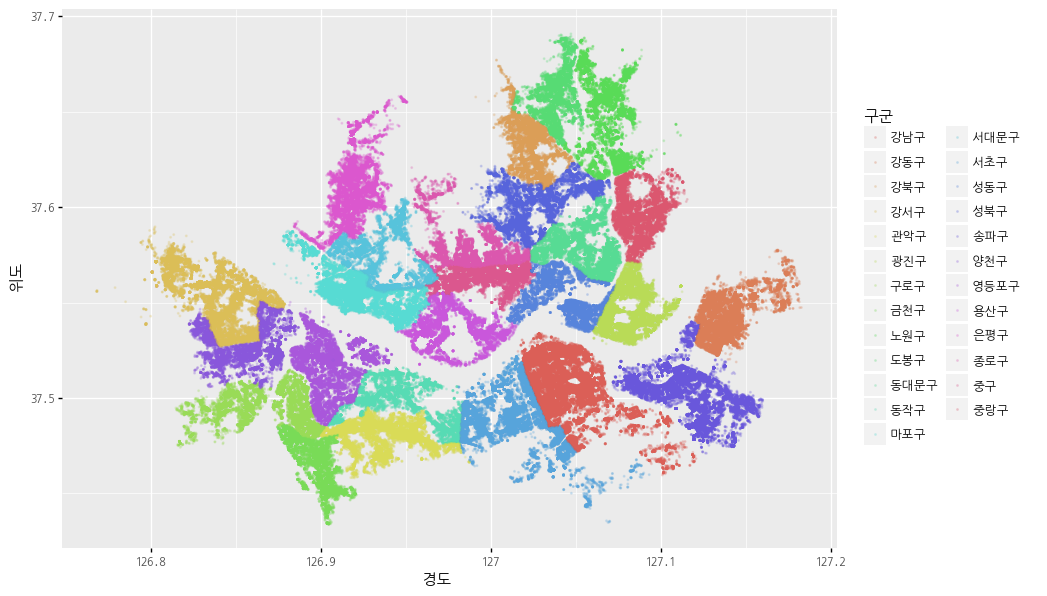

<ggplot: (-9223371851320377263)>

In [27]:
(
    ggplot(shop_seoul, aes(x='경도', y='위도', color='구군'))
        + geom_point(size=0.2, alpha=0.2)
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 7))
)

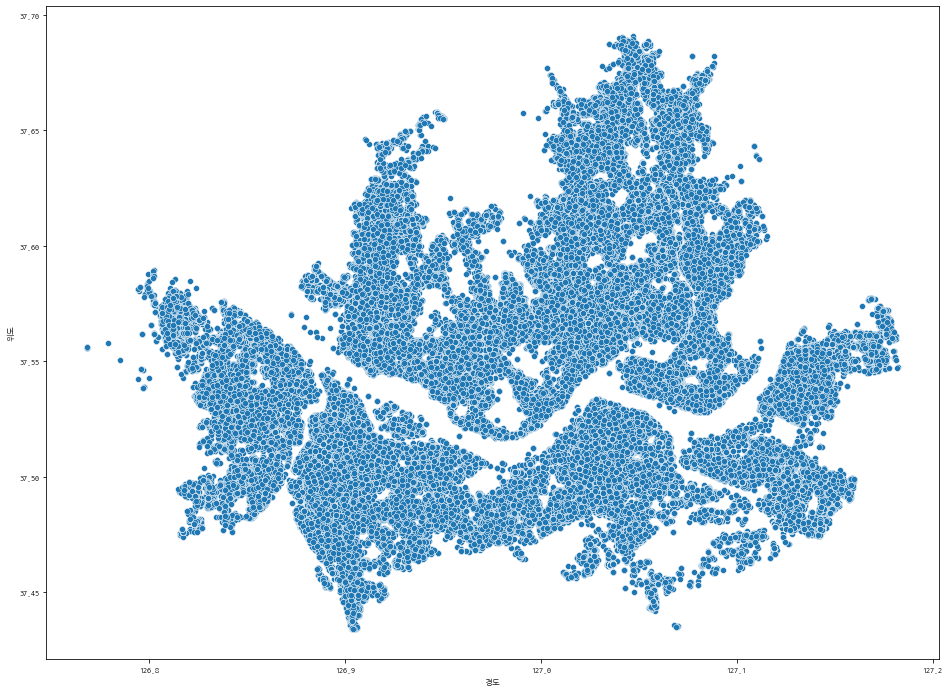

In [28]:
plt.figure(figsize=(16,12))
sns.scatterplot(data= shop_seoul, x='경도', y='위도')
plt.show()

In [29]:
set(shop_seoul.상권업종대분류명)

{'관광/여가/오락', '부동산', '생활서비스', '소매', '숙박', '스포츠', '음식', '학문/교육'}

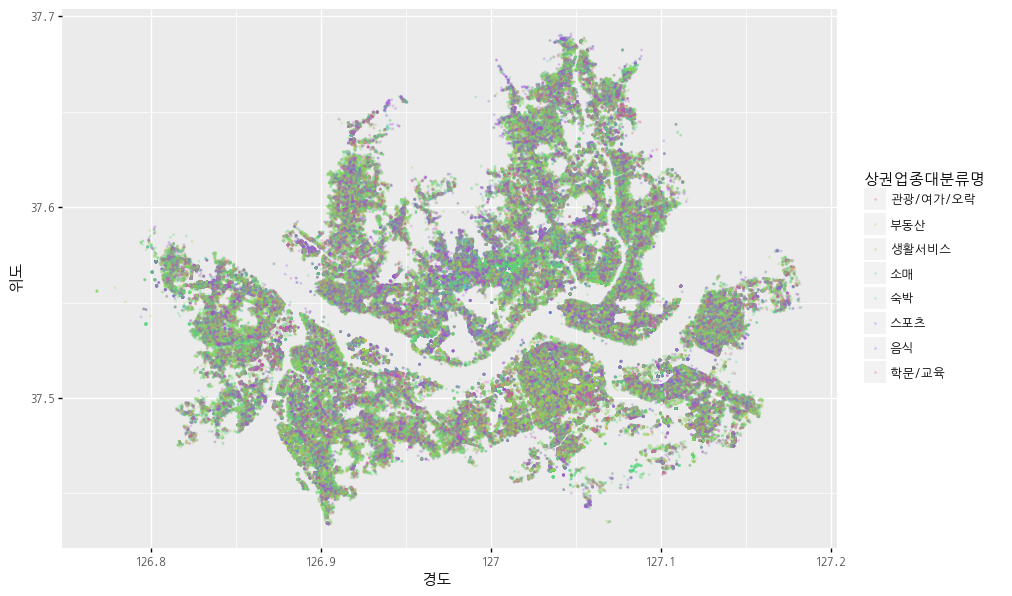

<ggplot: (185532082131)>

In [30]:
(
    ggplot(shop_seoul, aes(x='경도', y='위도', color='상권업종대분류명'))
        + geom_point(size=0.2, alpha=0.2)
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 7))
        + scale_fill_gradient(low='blue', high='green')
)

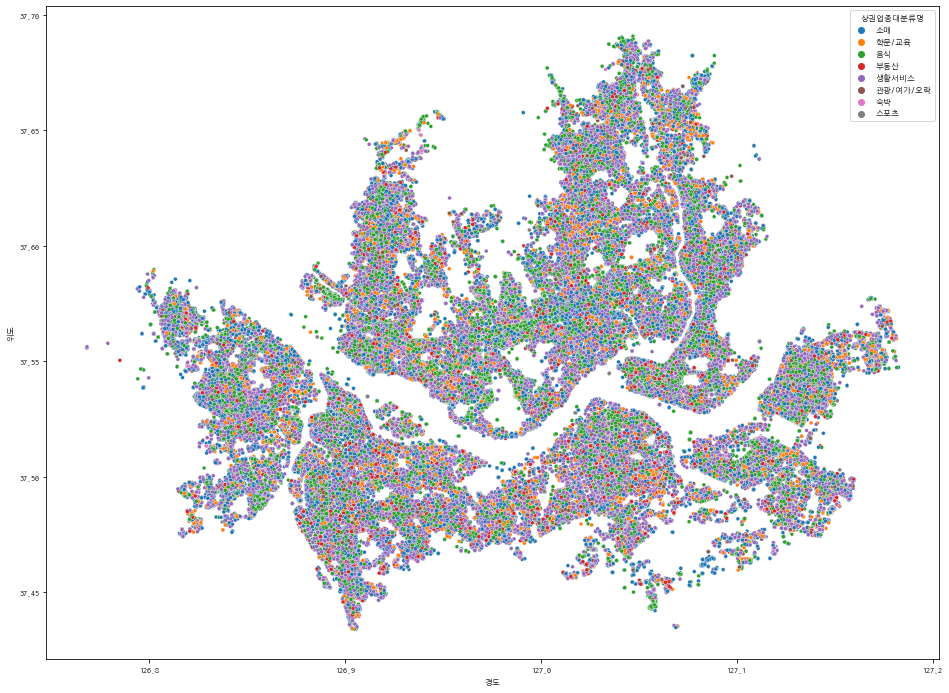

In [31]:
plt.figure(figsize=(16, 12))
sns.scatterplot(data=shop_seoul, x='경도', y='위도', s=15, hue='상권업종대분류명')
plt.show()

학문/교육과 관련된 정보 보기

In [32]:
shop_busan_edu= shop_busan[shop_busan.상권업종대분류명=='학문/교육']
shop_busan_edu

상호명           지점명 상권업종대분류명   상권업종중분류명   상권업종소분류명    시도명  시군구명  \
377742      김극무영어           NaN    학문/교육      학원-어학  학원-외국어/어학  부산광역시   동래구   
377766     탑국어교습소           NaN    학문/교육  학원-보습교습입시      학원-입시  부산광역시  부산진구   
377776   현대아카데미학원           NaN    학문/교육  학원-보습교습입시      학원-입시  부산광역시    남구   
377782     대림단과학원           NaN    학문/교육  학원-보습교습입시      학원-입시  부산광역시    중구   
377806  박병규영어전문학원           NaN    학문/교육  학원-보습교습입시      학원-입시  부산광역시   금정구   
...           ...           ...      ...        ...        ...    ...   ...   
540246        공부방     한솔플러스영어동원    학문/교육       학원기타     학원(종합)  부산광역시    북구   
540248       단비누리           NaN    학문/교육       학원기타     학원(종합)  부산광역시  부산진구   
540255        비욘드  잉글리쉬좌동캠퍼스어학원    학문/교육  학원-보습교습입시      학원-입시  부산광역시  해운대구   
540257   힐즈가든아카데미           NaN    학문/교육       학원기타      학원-기타  부산광역시  해운대구   
540275       행운쉘터           NaN    학문/교육    도서관/독서실        독서실  부산광역시   사하구   

        행정동명   법정동명                   지번주소                   도로명주소  \
377742  사직2동    사직동     부산광역시 동래구 사직동 1017        부산광역시 동래구 사직로 80   
377766  개금3동    개금동  부산광역시 부산진구 개금동 447-16     부산광역시 부산진구 백양대로 314   
377776  문현1동    문현동      부산광역시 남구 문현동 73-1   부산광역시 남구 진남로198번길 9-1   
377782   대청동  대청동2가     부산광역시 중구 대청동2가 9-9      부산광역시 중구 대청로99번길 8   
377806  구서1동    구서동    부산광역시 금정구 구서동 86-87   부산광역시 금정구 수림로50번길 198   
...      ...    ...                    ...                     ...   
540246  화명1동    화명동      부산광역시 북구 화명동 1150       부산광역시 북구 금곡대로 228   
540248   연지동    연지동  부산광역시 부산진구 연지동 250-76       부산광역시 부산진구 성지로 37   
540255   좌4동     좌동   부산광역시 해운대구 좌동 1407-2    부산광역시 해운대구 좌동순환로 173   
540257   중1동     중동    부산광역시 해운대구 중동 149-1  부산광역시 해운대구 좌동순환로8번길 78   
540275  하단1동    하단동     부산광역시 사하구 하단동 1176     부산광역시 사하구 하신중앙로 265   

                경도         위도     시도    구군       도로명  
377742  129.057535  35.196642  부산광역시   동래구       사직로  
377766  129.017191  35.154342  부산광역시  부산진구      백양대로  
377776  129.079620  35.144464  부산광역시    남구  진남로198번길  
377782  129.030905  35.103469  부산광역시    중구   대청로99번길  
377806  129.090212  35.248145  부산광역시   금정구   수림로50번길  
...            ...        ...    ...   ...       ...  
540246  129.014102  35.229112  부산광역시    북구      금곡대로  
540248  129.051129  35.175019  부산광역시  부산진구       성지로  
540255  129.175304  35.178177  부산광역시  해운대구     좌동순환로  
540257  129.170791  35.169676  부산광역시  해운대구  좌동순환로8번길  
540275  128.958515  35.099943  부산광역시   사하구     하신중앙로  

[10592 rows x 16 columns]

In [33]:
shop_seoul_edu= shop_seoul[shop_seoul.상권업종대분류명=='학문/교육']
shop_seoul_edu

상호명     지점명 상권업종대분류명   상권업종중분류명     상권업종소분류명    시도명  시군구명  \
3       김선희꼼꼼국어교습소     NaN    학문/교육  학원-보습교습입시        학원-입시  서울특별시   송파구   
8            무비디자인     NaN    학문/교육  학원-창업취업취미       학원-디자인  서울특별시   마포구   
18            힐리빙텔     NaN    학문/교육    도서관/독서실          독서실  서울특별시  서대문구   
19         김샘수학교습소     NaN    학문/교육  학원-보습교습입시        학원-입시  서울특별시    중구   
43          노바수학학원     NaN    학문/교육  학원-보습교습입시        학원-입시  서울특별시   강남구   
...            ...     ...      ...        ...          ...    ...   ...   
377616     젬마에듀케이션     NaN    학문/교육       학원기타       학원(종합)  서울특별시   노원구   
377619     헤어앤에스엠피     NaN    학문/교육      학원-어학    학원-외국어/어학  서울특별시  동대문구   
377635          학원   꿈의숲음악    학문/교육  학원-음악미술무용  피아노/바이올린/기타  서울특별시   강북구   
377641       트레저애드     NaN    학문/교육  학원-예능취미체육   레크레이션지도/상담  서울특별시   종로구   
377717     그린섬미술학원  3관미술학원    학문/교육  학원-음악미술무용     서예/서화/미술  서울특별시   강남구   

        행정동명  법정동명                   지번주소                  도로명주소          경도  \
3       방이1동   방이동    서울특별시 송파구 방이동 197-3  서울특별시 송파구 위례성대로12길 31  127.121520   
8        대흥동  노고산동  서울특별시 마포구 노고산동 107-17        서울특별시 마포구 백범로 8  126.936717   
18       신촌동   대현동   서울특별시 서대문구 대현동 37-69   서울특별시 서대문구 이화여대5길 28  126.944057   
19      신당5동   신당동       서울특별시 중구 신당동 851     서울특별시 중구 퇴계로90길 74  127.020965   
43      일원2동   개포동     서울특별시 강남구 개포동 12-4      서울특별시 강남구 개포로 615  127.075573   
...      ...   ...                    ...                    ...         ...   
377616  월계3동   월계동       서울특별시 노원구 월계동 18       서울특별시 노원구 마들로 31  127.068175   
377619  장안2동   장안동   서울특별시 동대문구 장안동 302-1     서울특별시 동대문구 장한로 181  127.071751   
377635   번3동    번동     서울특별시 강북구 번동 308-3    서울특별시 강북구 오현로34길 12  127.040018   
377641   무악동   무악동       서울특별시 종로구 무악동 82   서울특별시 종로구 통일로 246-20  126.962054   
377717  대치4동   대치동   서울특별시 강남구 대치동 908-17    서울특별시 강남구 선릉로72길 13  127.052191   

               위도     시도    구군       도로명  
3       37.510967  서울특별시   송파구  위례성대로12길  
8       37.553996  서울특별시   마포구       백범로  
18      37.558414  서울특별시  서대문구    이화여대5길  
19      37.560996  서울특별시    중구    퇴계로90길  
43      37.492649  서울특별시   강남구       개포로  
...           ...    ...   ...       ...  
377616  37.617387  서울특별시   노원구       마들로  
377619  37.576634  서울특별시  동대문구       장한로  
377635  37.628595  서울특별시   강북구    오현로34길  
377641  37.577072  서울특별시   종로구       통일로  
377717  37.500384  서울특별시   강남구    선릉로72길  

[27288 rows x 16 columns]

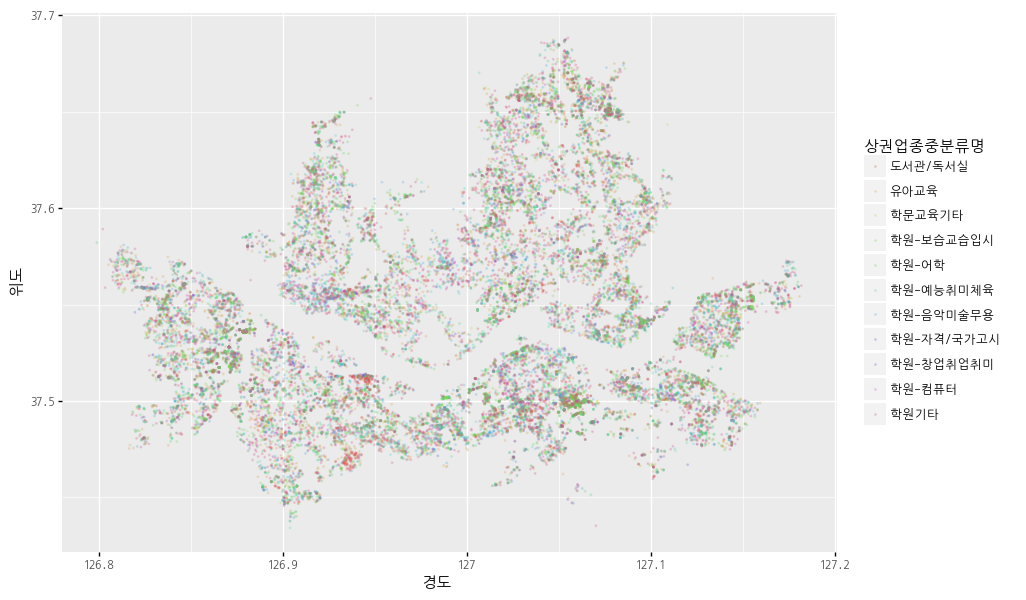

<ggplot: (185529457868)>

In [34]:
(
    ggplot(shop_seoul_edu, aes(x='경도', y='위도', color='상권업종중분류명'))
        + geom_point(size=0.2, alpha=0.2)
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 7))
        + scale_fill_gradient(low='blue', high='green')
)

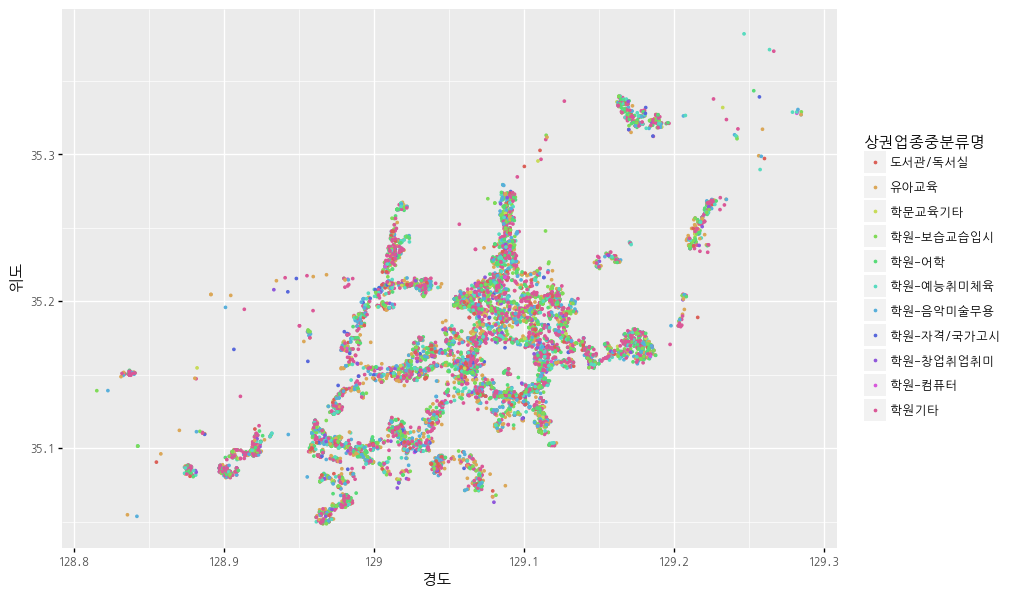

<ggplot: (185541102305)>

In [35]:
(
    ggplot(shop_busan_edu, aes(x='경도', y='위도', color='상권업종중분류명'))
        + geom_point(size=0.5, alpha=1)
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 7))
        + scale_fill_gradient(low='blue', high='green')
)

부동산과 관련된 정보 보기

In [36]:
shop_busan_realty = shop_busan[shop_busan.상권업종대분류명 == '부동산']
shop_busan_realty

상호명  지점명 상권업종대분류명 상권업종중분류명 상권업종소분류명    시도명  시군구명  행정동명  \
377778          최경남부동산  NaN      부동산    부동산중개    부동산중개  부산광역시   사하구  괴정1동   
377780         삼성공인중개사  NaN      부동산    부동산중개    부동산중개  부산광역시  부산진구   초읍동   
377821             부동산  NaN      부동산    부동산중개    부동산중개  부산광역시    중구   광복동   
377958           OK부동산  NaN      부동산    부동산중개    부동산중개  부산광역시    북구  화명2동   
377978          박말남부동산  NaN      부동산    부동산중개    부동산중개  부산광역시   강서구  대저1동   
...                ...  ...      ...      ...      ...    ...   ...   ...   
540149              담을  NaN      부동산       분양  건물분양-종합  부산광역시   연제구  연산5동   
540163      시티부동산중개사무소  NaN      부동산    부동산중개    부동산중개  부산광역시   수영구  남천2동   
540214          대원시티건설  NaN      부동산       분양     주택공급  부산광역시   연제구  연산5동   
540252              박력  NaN      부동산       분양  건물분양-종합  부산광역시    북구  화명1동   
540270  비에스부동산공인중개사사무소  NaN      부동산    부동산중개    부동산중개  부산광역시   기장군   기장읍   

         법정동명                   지번주소                    도로명주소          경도  \
377778    괴정동   부산광역시 사하구 괴정동 531-26   부산광역시 사하구 낙동대로249번길 50  128.990783   
377780    초읍동  부산광역시 부산진구 초읍동 269-59       부산광역시 부산진구 새싹로 200  129.049337   
377821  창선동1가    부산광역시 중구 창선동1가 38-2          부산광역시 중구 광복로 54  129.030905   
377958    화명동       부산광역시 북구 화명동 512          부산광역시 북구 산성로 88  129.022738   
377978   대저1동  부산광역시 강서구 대저1동 433-17  부산광역시 강서구 공항로1309번길 156  128.980345   
...       ...                    ...                      ...         ...   
540149    연산동  부산광역시 연제구 연산동 1492-20        부산광역시 연제구 신촌로 8-1  129.077487   
540163    남천동    부산광역시 수영구 남천동 148-9       부산광역시 수영구 광안해변로 95  129.114007   
540214    연산동  부산광역시 연제구 연산동 1127-11    부산광역시 연제구 월드컵대로 160-1  129.079143   
540252    화명동      부산광역시 북구 화명동 2337        부산광역시 북구 금곡대로 175  129.009502   
540270    기장읍  부산광역시 기장군 기장읍 동부리 183    부산광역시 기장군 기장읍 차성로 299  129.213383   

               위도     시도    구군        도로명  
377778  35.097169  부산광역시   사하구  낙동대로249번길  
377780  35.173908  부산광역시  부산진구        새싹로  
377821  35.099097  부산광역시    중구        광복로  
377958  35.241478  부산광역시    북구        산성로  
377978  35.215490  부산광역시   강서구  공항로1309번길  
...           ...    ...   ...        ...  
540149  35.182422  부산광역시   연제구        신촌로  
540163  35.143233  부산광역시   수영구      광안해변로  
540214  35.187275  부산광역시   연제구      월드컵대로  
540252  35.224914  부산광역시    북구       금곡대로  
540270  35.244296  부산광역시   기장군        기장읍  

[7390 rows x 16 columns]

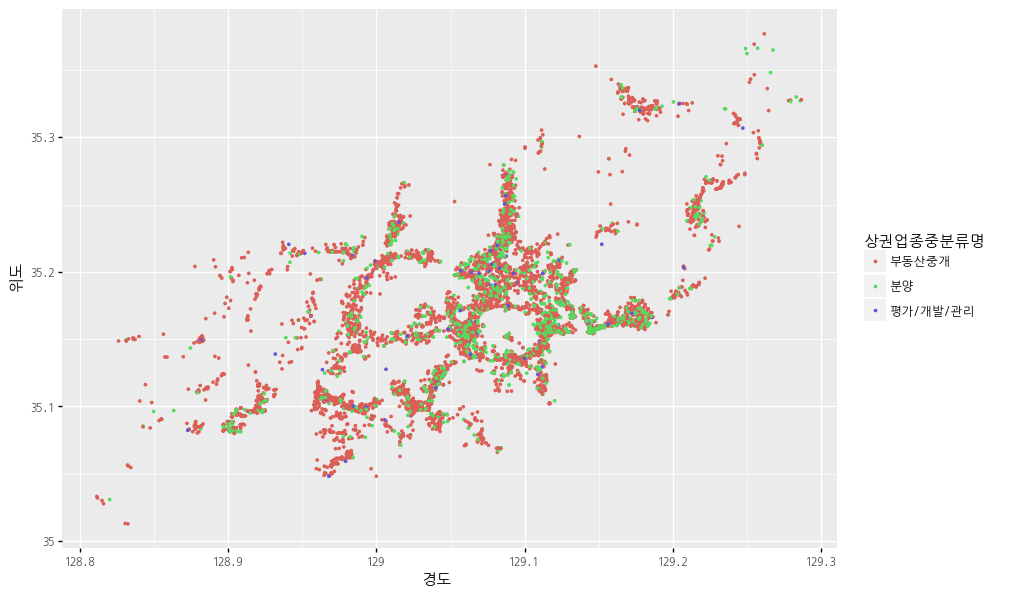

<ggplot: (-9223371851321595669)>

In [37]:
(
    ggplot(shop_busan_realty, aes(x='경도', y='위도', color='상권업종중분류명'))
        + geom_point(size=0.5, alpha=1.0)
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 7))
        + scale_fill_gradient(low='blue', high='green')
)

컴퓨터학원과 관련된 정보 보기

In [38]:
set(shop_seoul_edu.상권업종중분류명)

{'도서관/독서실',
 '유아교육',
 '학문교육기타',
 '학원-보습교습입시',
 '학원-어학',
 '학원-예능취미체육',
 '학원-음악미술무용',
 '학원-자격/국가고시',
 '학원-창업취업취미',
 '학원-컴퓨터',
 '학원기타'}

In [39]:
shop_seoul_edu_computer = shop_seoul[shop_seoul.상권업종중분류명 == '학원-컴퓨터']
shop_seoul_edu_computer

상호명      지점명 상권업종대분류명 상권업종중분류명 상권업종소분류명    시도명 시군구명  행정동명 법정동명  \
4920       진원컴퓨터학원      NaN    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시  양천구  신월5동  신월동   
5707     대성컴퓨터회계학원  대성컴퓨터회계    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시  관악구   인헌동  봉천동   
7137       구로컴퓨터학원      NaN    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시  금천구  시흥1동  시흥동   
13961    아몬정보컴퓨터학원      NaN    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시  중랑구  중화1동  중화동   
15541      구미컴퓨터학원      NaN    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시  강남구  역삼1동  역삼동   
...            ...      ...      ...      ...      ...    ...  ...   ...  ...   
349153          학원    잼코딩서초    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시  서초구  서초1동  서초동   
353408  메타코딩컴퓨터교습소      NaN    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시  양천구  신월4동  신월동   
354865         네오락      NaN    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시  서초구  반포1동  반포동   
367284   휴몬랩코딩아카데미      NaN    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시  강남구  압구정동  신사동   
377433   예성아이티아카데미      NaN    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시  강동구  천호3동  천호동   

                         지번주소                 도로명주소          경도         위도  \
4920       서울특별시 양천구 신월동 28-6      서울특별시 양천구 화곡로 41  126.826484  37.539544   
5707    서울특별시 관악구 봉천동 1657-24  서울특별시 관악구 남부순환로 1952  126.965659  37.475943   
7137     서울특별시 금천구 시흥동 870-10    서울특별시 금천구 시흥대로 266  126.899903  37.457508   
13961     서울특별시 중랑구 중화동 290-5  서울특별시 중랑구 동일로130길 39  127.082118  37.599980   
15541     서울특별시 강남구 역삼동 816-3    서울특별시 강남구 강남대로 416  127.027137  37.499793   
...                       ...                   ...         ...        ...   
349153   서울특별시 서초구 서초동 1603-9  서울특별시 서초구 서초중앙로 40-6  127.016443  37.485648   
353408   서울특별시 양천구 신월동 439-16      서울특별시 양천구 오목로 19  126.839661  37.521645   
354865      서울특별시 서초구 반포동 745    서울특별시 서초구 사평대로 335  127.019591  37.503452   
367284    서울특별시 강남구 신사동 609-6  서울특별시 강남구 압구정로32길 24  127.029759  37.526171   
377433      서울특별시 강동구 천호동 451   서울특별시 강동구 천호대로 1053  127.128950  37.537378   

           시도   구군      도로명  
4920    서울특별시  양천구      화곡로  
5707    서울특별시  관악구    남부순환로  
7137    서울특별시  금천구     시흥대로  
13961   서울특별시  중랑구  동일로130길  
15541   서울특별시  강남구     강남대로  
...       ...  ...      ...  
349153  서울특별시  서초구    서초중앙로  
353408  서울특별시  양천구      오목로  
354865  서울특별시  서초구     사평대로  
367284  서울특별시  강남구  압구정로32길  
377433  서울특별시  강동구     천호대로  

[172 rows x 16 columns]

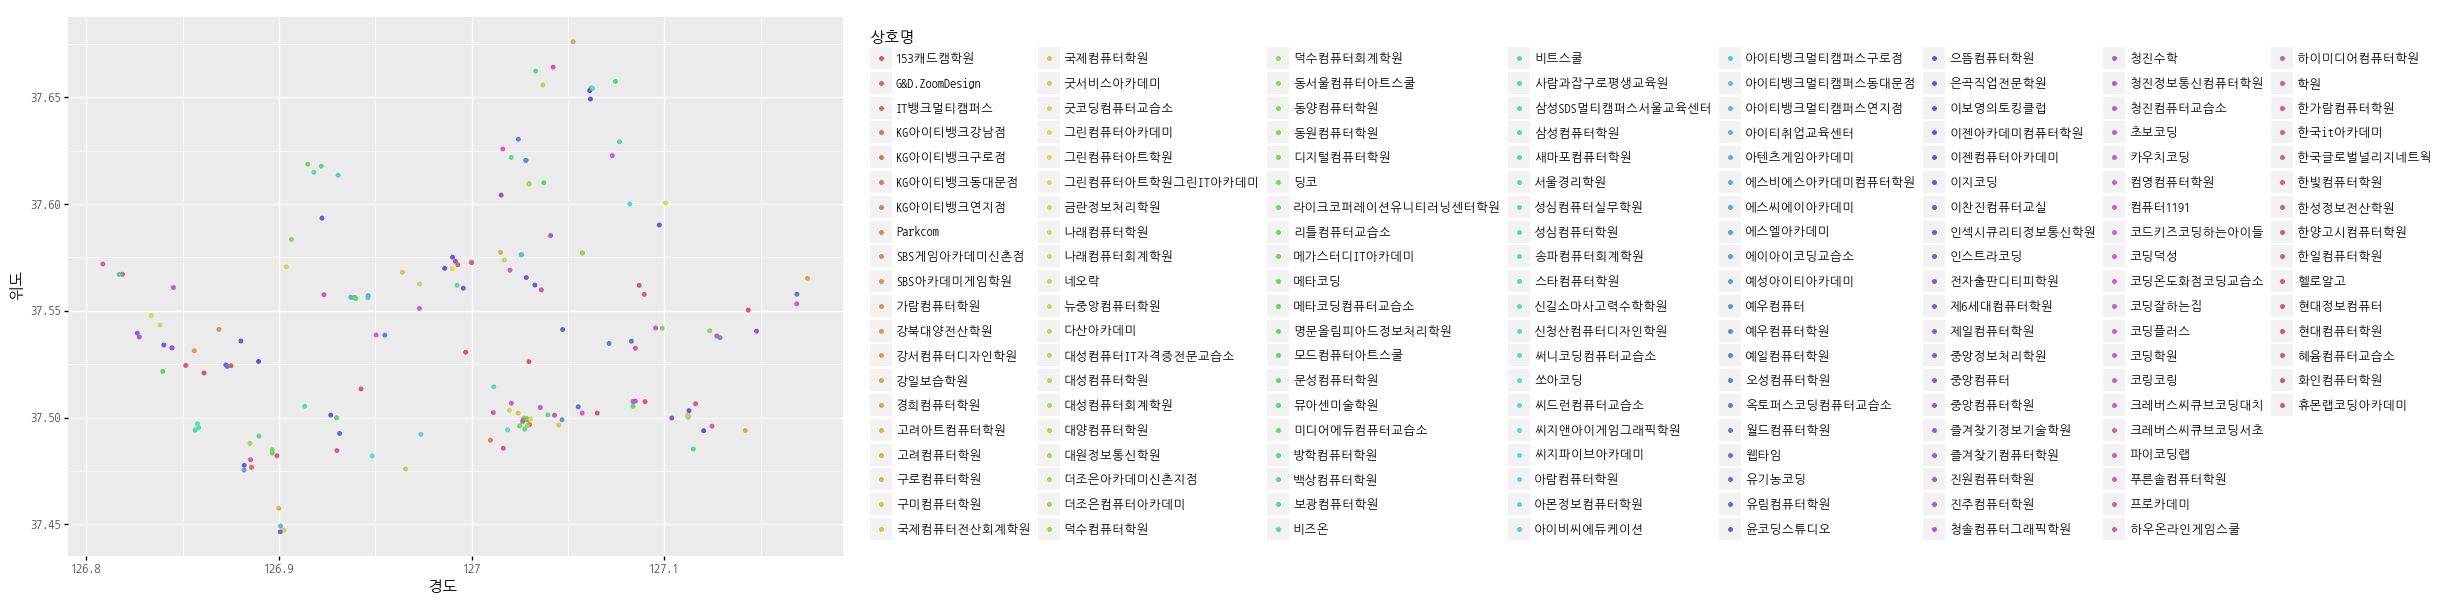

<ggplot: (185538866373)>

In [40]:
(
    ggplot(shop_seoul_edu_computer, aes(x='경도', y='위도', color='상호명'))
        + geom_point(size=1)
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 7))
        + scale_fill_gradient(low='blue', high='green')
)

In [41]:
shop_seoul_edu_computer[shop_seoul_edu_computer.상호명.str.find('더조은')>=0]

상호명   지점명 상권업종대분류명 상권업종중분류명 상권업종소분류명    시도명  시군구명  행정동명 법정동명  \
21736   더조은아카데미신촌지점  신촌지점    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시  서대문구   신촌동  창천동   
136104   더조은컴퓨터아카데미  강남지점    학문/교육   학원-컴퓨터    컴퓨터학원  서울특별시   강남구  역삼1동  역삼동   

                        지번주소               도로명주소          경도         위도  \
21736   서울특별시 서대문구 창천동 20-51  서울특별시 서대문구 신촌로 119  126.939007  37.556161   
136104   서울특별시 강남구 역삼동 826-1  서울특별시 강남구 강남대로 374  127.028868  37.496230   

           시도    구군   도로명  
21736   서울특별시  서대문구   신촌로  
136104  서울특별시   강남구  강남대로

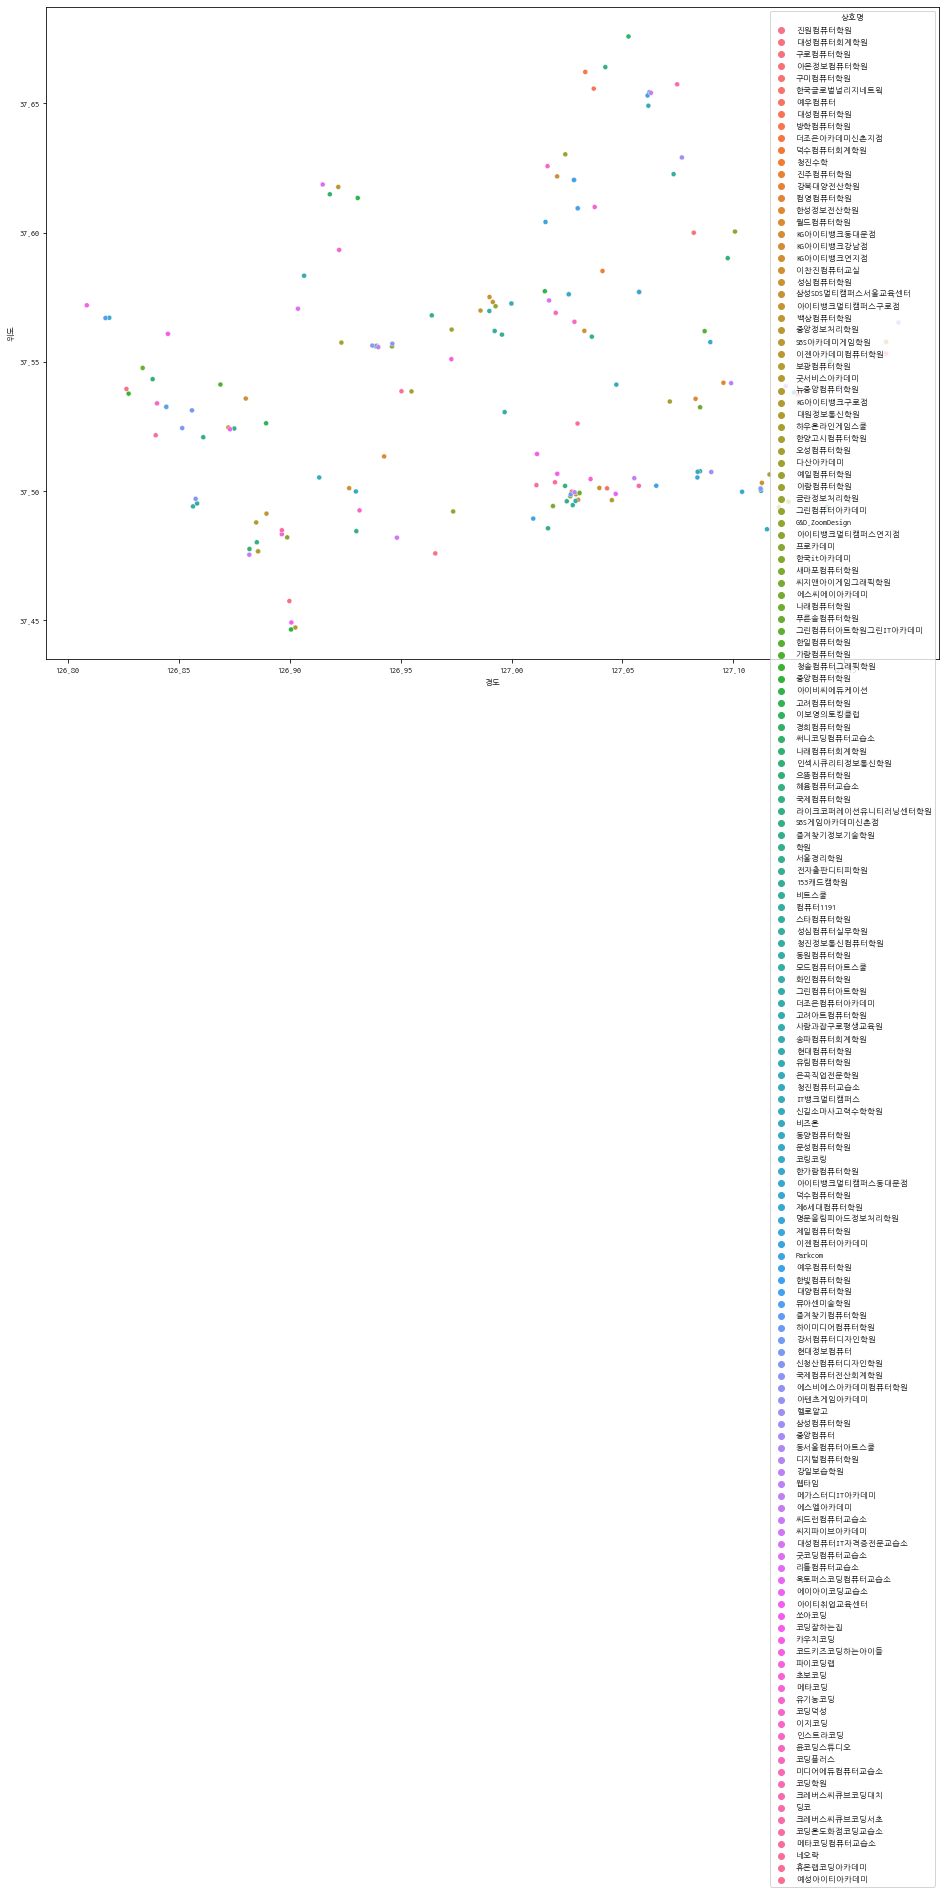

In [42]:
plt.figure(figsize=(16, 12))
sns.scatterplot(data=shop_seoul_edu_computer, x='경도', y='위도', s=25, hue='상호명')
plt.show()

folium Map 컴퓨터 학원 위치 시각화

In [43]:
import folium

In [44]:
data = shop_seoul_edu_computer
edu_map = folium.Map(location=[data['위도'].mean(), data['경도'].mean()], zoom_start=12)

'''
for _, edu in data.iterrows(): # index와 data를 튜플로 리턴
#     print(index, edu)
    popup = folium.Popup('{}: {}'.format(edu['상호명'], edu['도로명주소']), max_width=300)
    folium.Marker(location=[edu['위도'], edu['경도']], popup=popup).add_to(edu_map)
'''
for i in data.index:
    popup = folium.Popup('{}: {}'.format(data.loc[i,'상호명'], data.loc[i,'도로명주소']), max_width=300)
    folium.Marker(location=[data.loc[i,'위도'], data.loc[i,'경도']], popup=popup).add_to(edu_map)

edu_map

커피점/카페 시각화

In [45]:
set(shop_seoul.상권업종중분류명)

{'PC/오락/당구/볼링등',
 '가구소매',
 '가방/신발/액세서리',
 '가전제품소매',
 '가정/주방/인테리어',
 '개인/가정용품수리',
 '개인서비스',
 '건강/미용식품',
 '경마/경륜/성인오락',
 '광고/인쇄',
 '기타서비스업',
 '기타음식업',
 '기타판매업',
 '놀이/여가/취미',
 '닭/오리요리',
 '대중목욕탕/휴게',
 '대행업',
 '도서관/독서실',
 '모텔/여관/여인숙',
 '무도/유흥/가무',
 '물품기기대여',
 '민박/하숙',
 '법무세무회계',
 '별식/퓨전요리',
 '부동산관련서비스',
 '부동산중개',
 '부페',
 '분식',
 '분양',
 '사무/문구/컴퓨터',
 '사진',
 '사진/광학/정밀기기소매',
 '선물/팬시/기념품',
 '세탁/가사서비스',
 '스포츠/운동',
 '시계/귀금속소매',
 '실내운동시설',
 '실외운동시설',
 '애견/애완/동물',
 '양식',
 '연극/영화/극장',
 '예술품/골동품/수석/분재',
 '예식/의례/관혼상제',
 '요가/단전/마사지',
 '운동/경기용품소매',
 '운송/배달/택배',
 '운영관리시설',
 '유스호스텔',
 '유아교육',
 '유아용품',
 '유흥주점',
 '음/식료품소매',
 '음식배달서비스',
 '의복의류',
 '의약/의료품소매',
 '이/미용/건강',
 '인력/고용/용역알선',
 '일식/수산물',
 '자동차/이륜차',
 '자동차/자동차용품',
 '장례/묘지',
 '제과제빵떡케익',
 '종교용품판매',
 '종합소매점',
 '주유소/충전소',
 '주택수리',
 '중고품소매/교환',
 '중식',
 '책/서적/도서',
 '철물/난방/건설자재소매',
 '취미/오락관련소매',
 '캠프/별장/펜션',
 '커피점/카페',
 '패스트푸드',
 '페인트/유리제품소매',
 '평가/개발/관리',
 '학문교육기타',
 '학원-보습교습입시',
 '학원-어학',
 '학원-예능취미체육',
 '학원-음악미술무용',
 '학원-자격/국가고시',
 '학원-창업취업취미',
 '학원-컴퓨터',
 

In [46]:
shop_seoul_cafe= shop_seoul[shop_seoul.상권업종중분류명=='커피점/카페']
shop_busan_cafe= shop_busan[shop_busan.상권업종중분류명=='커피점/카페']
shop_saha_cafe= shop_saha[shop_saha.상권업종중분류명=='커피점/카페']
shop_saha_cafe

상호명     지점명 상권업종대분류명 상권업종중분류명     상권업종소분류명    시도명 시군구명  행정동명  \
378397          단디코카     NaN       음식   커피점/카페  커피전문점/카페/다방  부산광역시  사하구  하단2동   
378501         이디야커피  부산다대포점       음식   커피점/카페  커피전문점/카페/다방  부산광역시  사하구  다대1동   
379269         컴파스커피    동아대점       음식   커피점/카페  커피전문점/카페/다방  부산광역시  사하구  하단2동   
379516            우인     NaN       음식   커피점/카페  커피전문점/카페/다방  부산광역시  사하구  감천2동   
383827         이디야커피     장림점       음식   커피점/카페  커피전문점/카페/다방  부산광역시  사하구  장림2동   
...              ...     ...      ...      ...          ...    ...  ...   ...   
539163         마일로하단    SK뷰점       음식   커피점/카페  커피전문점/카페/다방  부산광역시  사하구  하단2동   
539334       하삼동커피하단    SK뷰점       음식   커피점/카페  커피전문점/카페/다방  부산광역시  사하구  하단2동   
539722          빨간염소     NaN       음식   커피점/카페  커피전문점/카페/다방  부산광역시  사하구  하단1동   
540141  명가커피&베이커리브런치     NaN       음식   커피점/카페  커피전문점/카페/다방  부산광역시  사하구  괴정3동   
540282         가배원커피     당리점       음식   커피점/카페  커피전문점/카페/다방  부산광역시  사하구  하단1동   

       법정동명                   지번주소                   도로명주소          경도  \
378397  하단동    부산광역시 사하구 하단동 497-1  부산광역시 사하구 낙동대로536번길 14  128.965799   
378501  다대동  부산광역시 사하구 다대동 1552-12       부산광역시 사하구 다대로 682  128.966690   
379269  하단동    부산광역시 사하구 하단동 494-3  부산광역시 사하구 낙동대로516번길 48  128.966192   
379516  감천동    부산광역시 사하구 감천동 2-202      부산광역시 사하구 감내2로 172  129.009787   
383827  장림동    부산광역시 사하구 장림동 338-1      부산광역시 사하구 장림번영로 84  128.974461   
...     ...                    ...                     ...         ...   
539163  하단동   부산광역시 사하구 하단동 1160-6     부산광역시 사하구 하신번영로 385  128.960539   
539334  하단동  부산광역시 사하구 하단동 1157-10     부산광역시 사하구 하신번영로 407  128.960332   
539722  하단동   부산광역시 사하구 하단동 624-23    부산광역시 사하구 괴정로57번길 49  128.973007   
540141  괴정동    부산광역시 사하구 괴정동 288-1      부산광역시 사하구 낙동대로 165  128.998256   
540282  하단동   부산광역시 사하구 하단동 623-17      부산광역시 사하구 낙동대로 413  128.973045   

               위도  
378397  35.112090  
378501  35.048200  
379269  35.112917  
379516  35.098734  
383827  35.080463  
...           ...  
539163  35.115422  
539334  35.117389  
539722  35.102956  
540141  35.102002  
540282  35.103424  

[427 rows x 13 columns]

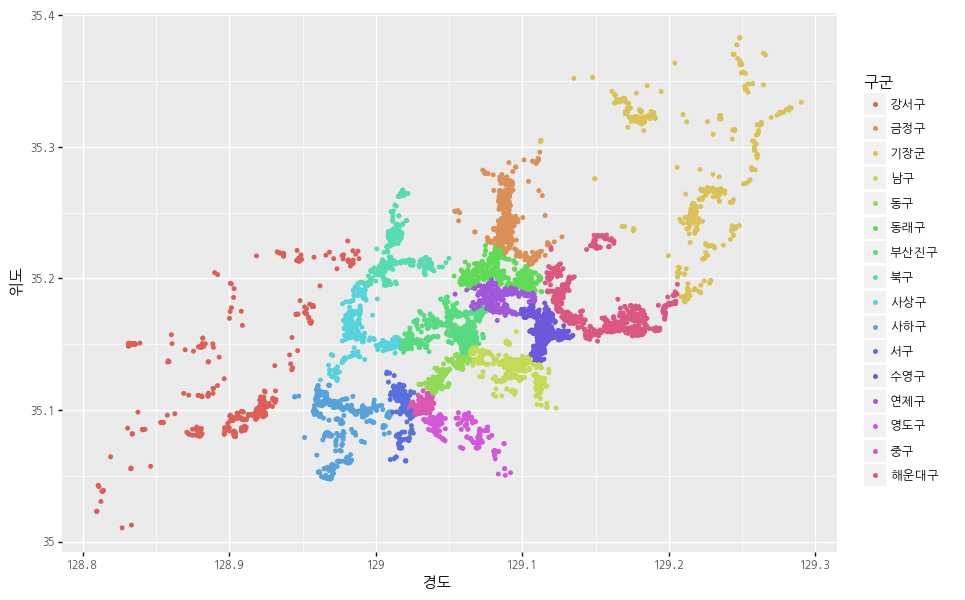

<ggplot: (185549699953)>

In [47]:
(
    ggplot(shop_busan_cafe, aes(x='경도', y='위도', color='구군'))
        + geom_point(size=1)
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 7))
)

이디야,스타벅스 시각화

In [48]:
data = shop_seoul_cafe[shop_seoul_cafe.상호명.str.find('이디야')>=0] # series는 str 있어야 문자열함수 사용가능!!
edu_map = folium.Map(location=[data['위도'].mean(), data['경도'].mean()], zoom_start=12)

for _, edu in data.iterrows(): # index와 data를 튜플로 리턴
#     print(index, edu)
    popup = folium.Popup('{}: {}'.format(edu['상호명'], edu['도로명주소']), max_width=300)
    folium.Marker(location=[edu['위도'], edu['경도']], popup=popup).add_to(edu_map)

edu_map

In [58]:
# 부산 이디야와 스벅 비교

data = shop_busan_cafe[shop_busan_cafe.상호명.str.find('이디야') >=0]
cafe_map = folium.Map(location=[data.위도.mean(), data.경도.mean()], zoom_start=12)

# iteritems() 메소드는 index와 데이터를 튜플 형태로 리턴한다.
for index, edu in data.iterrows():
    popup = folium.Popup('{} {}: {}'.format(edu['상호명'], edu['지점명'], edu['도로명주소']), max_width=300)
    folium.CircleMarker(location=[edu['위도'], edu['경도']], popup=popup, radius=2).add_to(cafe_map)

    
    
data = shop_busan_cafe[shop_busan_cafe.상호명.str.find('스타벅스') >=0]
for index, edu in data.iterrows():
    popup = folium.Popup('{} {}: {}'.format(edu['상호명'], edu['지점명'], edu['도로명주소']), max_width=300)
    folium.CircleMarker(location=[edu['위도'], edu['경도']], popup=popup, radius=2, color='green').add_to(cafe_map)
    
cafe_map

In [50]:
shop_seoul_cafe[shop_seoul_cafe.상호명.str.find('이디야커피')>=0] # series는 str 있어야 문자열함수 사용가능!!


상호명      지점명 상권업종대분류명 상권업종중분류명     상권업종소분류명    시도명  시군구명  행정동명  \
1109         이디야커피     신길역점       음식   커피점/카페  커피전문점/카페/다방  서울특별시  영등포구  신길1동   
1458         이디야커피     라이프점       음식   커피점/카페  커피전문점/카페/다방  서울특별시  영등포구   여의동   
2352    이디야커피양재AT점    양재AT점       음식   커피점/카페  커피전문점/카페/다방  서울특별시   서초구  양재2동   
2422         이디야커피      시흥점       음식   커피점/카페  커피전문점/카페/다방  서울특별시   금천구  시흥2동   
4253         이디야커피    개봉중앙점       음식   커피점/카페  커피전문점/카페/다방  서울특별시   구로구  개봉3동   
...            ...      ...      ...      ...          ...    ...   ...   ...   
364946       이디야커피     흑석역점       음식   커피점/카페  커피전문점/카페/다방  서울특별시   동작구   흑석동   
367768       이디야커피    구로구청점       음식   커피점/카페  커피전문점/카페/다방  서울특별시   구로구  구로5동   
368908       이디야커피      NaN       음식   커피점/카페  커피전문점/카페/다방  서울특별시   중랑구  상봉1동   
369284       이디야커피  남부지방법원점       음식   커피점/카페  커피전문점/카페/다방  서울특별시   양천구  신정1동   
372636       이디야커피     광화문점       음식   커피점/카페  커피전문점/카페/다방  서울특별시   종로구   사직동   

        법정동명                  지번주소                 도로명주소          경도  \
1109     신길동   서울특별시 영등포구 신길동 59-2   서울특별시 영등포구 영등포로 353  126.918062   
1458    여의도동  서울특별시 영등포구 여의도동 61-3     서울특별시 영등포구 63로 40  126.939198   
2352     양재동   서울특별시 서초구 양재동 326-9       서울특별시 서초구 동산로 3  127.040265   
2422     시흥동    서울특별시 금천구 시흥동 1011     서울특별시 금천구 금하로 750  126.913646   
4253     개봉동  서울특별시 구로구 개봉동 358-20    서울특별시 구로구 개봉로3길 26  126.854872   
...      ...                   ...                   ...         ...   
364946   흑석동    서울특별시 동작구 흑석동 9-89   서울특별시 동작구 현충로 100-1  126.964725   
367768   구로동   서울특별시 구로구 구로동 103-8   서울특별시 구로구 가마산로25길 9  126.890305   
368908   상봉동  서울특별시 중랑구 상봉동 268-33    서울특별시 중랑구 상봉중앙로 36  127.087776   
369284   신정동  서울특별시 양천구 신정동 1014-5   서울특별시 양천구 은행정로4길 25  126.862583   
372636   도렴동   서울특별시 종로구 도렴동 150-1  서울특별시 종로구 세종대로23길 15  126.975637   

               위도     시도    구군      도로명  
1109    37.515118  서울특별시  영등포구     영등포로  
1458    37.519544  서울특별시  영등포구      63로  
2352    37.469075  서울특별시   서초구      동산로  
2422    37.449066  서울특별시   금천구      금하로  
4253    37.486436  서울특별시   구로구    개봉로3길  
...           ...    ...   ...      ...  
364946  37.507634  서울특별시   동작구      현충로  
367768  37.496614  서울특별시   구로구  가마산로25길  
368908  37.600285  서울특별시   중랑구    상봉중앙로  
369284  37.521507  서울특별시   양천구   은행정로4길  
372636  37.571496  서울특별시   종로구  세종대로23길  

[431 rows x 16 columns]

In [51]:
set(shop_seoul_cafe[shop_seoul_cafe.상호명.str.find('이디야')>=0].상호명) # 있는거 다 알려줌

{'마스터키이디야마곡나루역점',
 '부일이디야커피',
 '엠케이이디야마곡나루역점',
 '을지사거리이디야커피숍',
 '이디야IBK고객센터',
 '이디야당산',
 '이디야마들역',
 '이디야서대문점2호',
 '이디야에스프레소',
 '이디야역삼플래티넘',
 '이디야잠실',
 '이디야카페',
 '이디야커피',
 '이디야커피가좌역점',
 '이디야커피낙원동점',
 '이디야커피돈암아리랑점',
 '이디야커피동소문동점',
 '이디야커피등촌동점',
 '이디야커피마곡역점',
 '이디야커피망우점',
 '이디야커피봉천중앙점',
 '이디야커피선정릉역점',
 '이디야커피세광교회점',
 '이디야커피숍',
 '이디야커피신금호역점',
 '이디야커피신당중앙점',
 '이디야커피신도림테크노마트',
 '이디야커피신림중앙점',
 '이디야커피양재AT점',
 '이디야커피영등포본동점',
 '이디야커피용두점',
 '이디야커피우장산동점',
 '이디야커피월계인덕점',
 '이디야커피전농뉴타운점',
 '이디야커피점',
 '이디야커피정릉아리랑점',
 '이디야커피중곡대원점',
 '이디야커피창신중앙점',
 '이디야커피텐즈힐점',
 '이디야커피한강공원로점',
 '이디야한국수출입은행'}

In [52]:
shop_seoul_cafe[shop_seoul_cafe.상호명.str.find('스타벅')>=0] # series는 str 있어야 문자열함수 사용가능!!


상호명       지점명 상권업종대분류명 상권업종중분류명     상권업종소분류명    시도명 시군구명  \
1508           스타벅스    동숭로아트점       음식   커피점/카페  커피전문점/카페/다방  서울특별시  종로구   
2435    스타벅스남부터미널2점   남부터미널2점       음식   커피점/카페  커피전문점/카페/다방  서울특별시  서초구   
2535           스타벅스     현대목동점       음식   커피점/카페  커피전문점/카페/다방  서울특별시  양천구   
3536    스타벅스미아사거리역점   미아사거리역점       음식   커피점/카페  커피전문점/카페/다방  서울특별시  강북구   
3555           스타벅스     가로수길점       음식   커피점/카페  커피전문점/카페/다방  서울특별시  강남구   
...             ...       ...      ...      ...          ...    ...  ...   
274249         스타벅스       NaN       음식   커피점/카페  커피전문점/카페/다방  서울특별시  광진구   
274622         스타벅스  태릉입구역DT점       음식   커피점/카페  커피전문점/카페/다방  서울특별시  노원구   
275139         스타벅스     서울역사점       음식   커피점/카페  커피전문점/카페/다방  서울특별시  용산구   
275664         스타벅스    도산사거리점       음식   커피점/카페  커피전문점/카페/다방  서울특별시  강남구   
318440         스타벅스     서대문역점       음식   커피점/카페  커피전문점/카페/다방  서울특별시  종로구   

        행정동명 법정동명                  지번주소                 도로명주소          경도  \
1508     이화동  동숭동      서울특별시 종로구 동숭동 30     서울특별시 종로구 동숭길 110  127.003887   
2435    서초3동  서초동  서울특별시 서초구 서초동 1457-1     서울특별시 서초구 효령로 274  127.014198   
2535     목1동   목동      서울특별시 양천구 목동 916    서울특별시 양천구 목동동로 257  126.874682   
3536     송중동  미아동   서울특별시 강북구 미아동 35-30      서울특별시 강북구 도봉로 32  127.030685   
3555     신사동  신사동  서울특별시 강남구 신사동 529-10  서울특별시 강남구 논현로175길 94  127.021629   
...      ...  ...                   ...                   ...         ...   
274249  중곡1동  중곡동  서울특별시 광진구 중곡동 241-58     서울특별시 광진구 긴고랑로 45  127.081329   
274622  공릉1동  공릉동   서울특별시 노원구 공릉동 653-8     서울특별시 노원구 화랑로 469  127.079298   
275139   남영동  동자동  서울특별시 용산구 동자동 43-205    서울특별시 용산구 한강대로 405  126.971712   
275664  논현2동  논현동    서울특별시 강남구 논현동 70-6     서울특별시 강남구 언주로 727  127.034097   
318440   교남동   평동      서울특별시 종로구 평동 222     서울특별시 종로구 통일로 134  126.966238   

               위도     시도   구군      도로명  
1508    37.582964  서울특별시  종로구      동숭길  
2435    37.484386  서울특별시  서초구      효령로  
2535    37.527147  서울특별시  양천구     목동동로  
3536    37.611841  서울특별시  강북구      도봉로  
3555    37.523184  서울특별시  강남구  논현로175길  
...           ...    ...  ...      ...  
274249  37.562814  서울특별시  광진구     긴고랑로  
274622  37.619249  서울특별시  노원구      화랑로  
275139  37.554828  서울특별시  용산구     한강대로  
275664  37.519593  서울특별시  강남구      언주로  
318440  37.566791  서울특별시  종로구      통일로  

[464 rows x 16 columns]

In [57]:
# 배라 vs 던킨

data = shop_seoul[shop_seoul['상호명'].str.find('스킨라빈스') >= 0]
cafe_map = folium.Map(location=[data['위도'].mean(), data['경도'].mean()], zoom_start=12, tiles='Stamen Terrain')
for i in data.index:
    popup = folium.Popup('{}: {}'.format(data.loc[i, '상호명'], data.loc[i, '도로명주소']), max_width=300)
    folium.CircleMarker(location=[data.loc[i, '위도'], data.loc[i, '경도']], popup=popup, 
                  radius=2, color='blue').add_to(cafe_map)

data = shop_seoul[shop_seoul['상호명'].str.find('던킨') >= 0]
for i in data.index:
    popup = folium.Popup('{}: {}'.format(data.loc[i, '상호명'], data.loc[i, '도로명주소']), max_width=300)
    folium.CircleMarker(location=[data.loc[i, '위도'], data.loc[i, '경도']], popup=popup, 
                  radius=2, color='green').add_to(cafe_map)
    
cafe_map.save('./output/cafe_map.html')
cafe_map

빠바 뚜쥬 

In [59]:
data = shop_seoul[shop_seoul['상호명'].str.find('파리바게뜨') >= 0]
cafe_map = folium.Map(location=[data['위도'].mean(), data['경도'].mean()], zoom_start=12, tiles='Stamen Terrain')
for i in data.index:
    popup = folium.Popup('{}: {}'.format(data.loc[i, '상호명'], data.loc[i, '도로명주소']), max_width=300)
    folium.CircleMarker(location=[data.loc[i, '위도'], data.loc[i, '경도']], popup=popup, 
                  radius=2, color='blue').add_to(cafe_map)

data = shop_seoul[shop_seoul['상호명'].str.find('뚜레쥬르') >= 0]
for i in data.index:
    popup = folium.Popup('{}: {}'.format(data.loc[i, '상호명'], data.loc[i, '도로명주소']), max_width=300)
    folium.CircleMarker(location=[data.loc[i, '위도'], data.loc[i, '경도']], popup=popup, 
                  radius=2, color='green').add_to(cafe_map)
    
cafe_map.save('./output/cafe_map.html')
cafe_map

빽다방 메가커피

In [60]:
data = shop_seoul[shop_seoul['상호명'].str.find('빽다방') >= 0]
cafe_map = folium.Map(location=[data['위도'].mean(), data['경도'].mean()], zoom_start=12, tiles='Stamen Terrain')
for i in data.index:
    popup = folium.Popup('{}: {}'.format(data.loc[i, '상호명'], data.loc[i, '도로명주소']), max_width=300)
    folium.CircleMarker(location=[data.loc[i, '위도'], data.loc[i, '경도']], popup=popup, 
                  radius=2, color='blue').add_to(cafe_map)

data = shop_seoul[shop_seoul['상호명'].str.find('메가커피') >= 0]
for i in data.index:
    popup = folium.Popup('{}: {}'.format(data.loc[i, '상호명'], data.loc[i, '도로명주소']), max_width=300)
    folium.CircleMarker(location=[data.loc[i, '위도'], data.loc[i, '경도']], popup=popup, 
                  radius=2, color='green').add_to(cafe_map)
    
cafe_map.save('./output/cafe_map.html')
cafe_map

구군별 카페 수 시각화

In [64]:
# 구군별 카페 수
shop_seoul_cafe_count = shop_seoul_cafe.groupby('구군').상호명.count()
shop_seoul_cafe_count

구군
강남구     2262
강동구      786
강북구      395
강서구     1157
관악구      755
광진구      866
구로구      609
금천구      523
노원구      634
도봉구      407
동대문구     587
동작구      600
마포구     1709
서대문구     719
서초구     1228
성동구      721
성북구      765
송파구     1304
양천구      616
영등포구    1004
용산구      767
은평구      639
종로구     1083
중구       950
중랑구      534
Name: 상호명, dtype: int64

In [66]:
# 구군별 위도 경도 평균
shop_seoul_cafe_lat = shop_seoul_cafe.groupby('구군').위도.mean()
shop_seoul_cafe_lat.head()

구군
강남구    37.506266
강동구    37.542181
강북구    37.632614
강서구    37.555494
관악구    37.480558
Name: 위도, dtype: float64

In [67]:
shop_seoul_cafe_lot = shop_seoul_cafe.groupby('구군').경도.mean()
shop_seoul_cafe_lot.head()

구군
강남구    127.044577
강동구    127.139299
강북구    127.023387
강서구    126.838198
관악구    126.939574
Name: 경도, dtype: float64

In [71]:
# 세가지 항목 concat(열방향)
shop_seoul_cafe_concat=pd.concat([shop_seoul_cafe_count, shop_seoul_cafe_lat, shop_seoul_cafe_lot], 
                                 axis=1)
shop_seoul_cafe_concat.columns = ['매장수', '위도', '경도']
shop_seoul_cafe_concat

매장수         위도          경도
구군                               
강남구   2262  37.506266  127.044577
강동구    786  37.542181  127.139299
강북구    395  37.632614  127.023387
강서구   1157  37.555494  126.838198
관악구    755  37.480558  126.939574
광진구    866  37.546073  127.081245
구로구    609  37.494695  126.870924
금천구    523  37.468778  126.892863
노원구    634  37.644810  127.069257
도봉구    407  37.658387  127.037696
동대문구   587  37.580147  127.054058
동작구    600  37.497902  126.949570
마포구   1709  37.556199  126.921500
서대문구   719  37.569473  126.937659
서초구   1228  37.488056  127.015077
성동구    721  37.550537  127.044960
성북구    765  37.598727  127.024626
송파구   1304  37.501748  127.114092
양천구    616  37.528031  126.860602
영등포구  1004  37.519136  126.906959
용산구    767  37.536743  126.979806
은평구    639  37.609535  126.919568
종로구   1083  37.578858  126.985639
중구     950  37.562669  126.991155
중랑구    534  37.597059  127.088167

In [78]:
data = shop_seoul_cafe_concat

# 서울시 위도 평균, 경도 평균
cafe_map = folium.Map(location=[data['위도'].mean(), data['경도'].mean()], zoom_start=12)

for index, cafe in data.iterrows(): # index와 data를 튜플로 리턴
    # 클릭시 팝업메시지.
    popup = folium.Popup('{}: {:,.0f}'.format(index, cafe['매장수']), max_width=300)
    folium.CircleMarker(location=[cafe['위도'], cafe['경도']], popup=popup,
                       radius=cafe.매장수/50, color='red', fill_color='blue').add_to(cafe_map)

cafe_map.save('./output/cafe_map.html')
cafe_map